#### **`Proyecto individual 02`**

##### **`Pasos realizados:`**


In [819]:
# LIBRERÍAS UTILIZADAS:
import pandas as pd #para la utilización de dataframe
import numpy as np # para crear array
from base64 import encode #para el encoding de los archivos import encodings
import chardet #detectar encoding
from IPython.display import HTML, display_html, display#para agregar títulos
from tkinter import Frame #para detectar que el tipo de dato es un dataframe de py
from unicodedata import normalize#para normalizar strings
import re #para normalizar incluyendo la ñ
import os #para desglozar la ruta del archivo
import datefinder #identificar datos tipo objeto/string que son fecha
import datetime #libreria de fechas , la usamos para identificar fechas
import itertools
import matplotlib.pyplot as plt #gráficas
import seaborn as sns#gráficas
sns.set()
#pip install missingno 
import missingno as msno#hacer gráficas de valores faltantes
import nltk
#para corregir coordenadas:
import geopandas 
import geopy
#para plotear los puntos georeferenciados
import plotly.express as gdp
import geopandas as gdp

# Esto sirve para configurar NLTK. La primera vez puede tardar un poco
nltk.download('punkt')
nltk.download('stopwords')

# Importamos esta libreria que nos permite reemplzar caracteres
import re

# Importamos la función que nos permite Stemmizar de nltk y definimos el stemmer
from nltk.stem import PorterStemmer

import datetime#corregir fechas

#IMPORTAMOS LAS LIBRERÍAS NECESARIAS PARA PREDICCION
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier # Modelo 1
from sklearn.svm import SVC # Modelo 2
from sklearn.tree import DecisionTreeClassifier # Modelo 3
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression # Metamodelo

#VER VALORES PERDIDOS
import missingno as msno

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gise\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gise\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [820]:
#creamos una función para normalizar el índice
def normalizar_index(df):
    df.reset_index(drop = True, inplace = True)
    return(df)

#### **`1. Carga de datos`**

In [821]:
#DEFINO UNA FUNCION PARA LA CARGA  DATOS QUE CONTEMPLA DISTINTOS TIPOS DE ARCHIVO: DEVUELVE UN DATAFRAME 
def carga_datos (ruta):
    #CARGA DE DATOS Y EXTRACCIÓN DE FECHA:
    #limpio la ruta del atchivo dejando solo el nombre y la extensión
    tupla_archivos=os.path.split(ruta)
    #de la tupla que me devuelve la divido en el nombre que lo voy a usar como suministro en extensión
    nombre_tipo_archivo=tupla_archivos[1]
    #la segunda parte de la tupla es el tipo de archivo que es que lo uso para saber cómo ingestar
    extension_archivo= os.path.splitext(nombre_tipo_archivo)[-1]
    #detección de la manera de abrirlo en base a la extensión del archivo
    if extension_archivo==".json":
        #desde json
        df=pd.read_json(ruta)
    elif extension_archivo==".csv":
        #desde csv
        try:
            df=pd.read_csv(ruta,sep=",",encoding='utf-16')
        except:
            df=pd.read_csv(ruta,sep=",",encoding='utf-8')
    elif extension_archivo==".txt":
        #desde txt
        with open(ruta, 'rb') as f:
            enc = chardet.detect(f.read())
        df=pd.read_csv(ruta,sep=",",encoding=enc['encoding'])
    elif extension_archivo==".xlsx":
        #desde un excel
        df=pd.read_excel(ruta,header=0)
        
    return df

In [822]:
#Cargo el dataset de train
train=carga_datos(r'C:\Users\Gise\Desktop\Data Since\LABS\Individuales\02\Datathon-mainmio\Datathon-main\properties_colombia_train.csv')

In [823]:
#reviso que se haya cargado correctamente
train.head(2)

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,2020-12-14,6.203000,-75.572000,Colombia,Antioquia,...,NaN,NaN,9.000000e+09,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203)
1,200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,Colombia,Cundinamarca,...,NaN,NaN,6.250000e+08,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485)


##### ***1.1 Exploración inicial del dataframe train***

*  ¿Qué forma tiene el dataset?

In [824]:
train.shape

(197549, 27)

*  ¿Cuántas instancias tiene?

197549

*  ¿Cuáles son sus columnas?

In [825]:
train.columns

Index(['Unnamed: 0', 'id', 'ad_type', 'start_date', 'end_date', 'created_on',
       'lat', 'lon', 'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms',
       'bathrooms', 'surface_total', 'surface_covered', 'price', 'currency',
       'price_period', 'title', 'description', 'property_type',
       'operation_type', 'geometry'],
      dtype='object')

*  ¿Qué tipos de valores tienen sus columnas? Son correctos? se pueden cambiar?

In [826]:
train.dtypes

Unnamed: 0           int64
id                  object
ad_type             object
start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
l1                  object
l2                  object
l3                  object
l4                  object
l5                  object
l6                  object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
price_period        object
title               object
description         object
property_type       object
operation_type      object
geometry            object
dtype: object

Podemos empezar diciendo que:
*  Hay que pasar a formato fecha: start_date, end_date, created_on

* Comparar geometry con las coordenadas existentes en latitud y longitud

*  ¿Cuáles son sus valores unicos?

In [827]:
train.nunique()

Unnamed: 0         197549
id                 197549
ad_type                 1
start_date            145
end_date              446
created_on            145
lat                 51077
lon                 50108
l1                      1
l2                     31
l3                    293
l4                     58
l5                     20
l6                    146
rooms                  29
bedrooms               37
bathrooms              20
surface_total        1035
surface_covered       783
price                6096
currency                2
price_period            1
title               95025
description        111371
property_type           8
operation_type          1
geometry            62807
dtype: int64

*  ¿Cuántos valores no nulos tiene ?

In [828]:
# Valores no nulos
train.count().sort_values()

l6                   6867
surface_total        6974
surface_covered      9802
l5                  27409
rooms               27537
price_period        35971
bedrooms            40525
l4                  45367
lat                148051
lon                148051
bathrooms          156467
l3                 186517
description        197428
currency           197482
price              197486
title              197548
property_type      197549
Unnamed: 0         197549
l2                 197549
l1                 197549
created_on         197549
end_date           197549
start_date         197549
ad_type            197549
id                 197549
operation_type     197549
geometry           197549
dtype: int64

*  ¿Tiene filas duplicadas?

In [829]:
train.duplicated().sum()

0

* ¿Vemos propiedades que tengan igual precio y descripción?

In [830]:
train[train.price.duplicated() & train.description.duplicated()].shape

(85447, 27)

In [831]:
#sacamos esas filas repetidas
lista_filas=train[train.price.duplicated() & train.description.duplicated()].index
#lista_filas
train=train.drop(index = lista_filas)

#### ***`2. ETL de train`***

### Normalización de Palabras

In [832]:
#Creamos una función de diagnóstico general para todo el dataset: Devuelve un dataframe diagnóstico de la tabla y el df ingestado con normalizaciones
def Estado_general_tabla (df=Frame):
    #Acomodamos el indice
    df=normalizar_index(df)
    #Vemos valores null
    nulos=df.isnull().sum().sum()
    #Vemos duplicados y existen los eliminamos
    duplicados=df.duplicated().sum().sum()
    if duplicados>0:
        print(duplicados)
        df.drop_duplicates(inplace = True)     

    #creamos listas vacías para guardar los valores que vayamos obteniendo del análisis de cada columna
    indice=0
    nombre_columna=[]
    tipo_de_dato=[]
    valores_null=[]
    cantidad_repetidos=[]
    cantidad_valores_unicos=[]
    valores_unicos=[]
    
    #recorremos cada columna del dataset con un bucle
    for c in df.columns:
        #vemos si la columna posee un volúmen de datos que sea analizable: se toma como criterio que tenga al menos un 1% de valores
        if df[c].isnull().sum()/(df[c].isnull().sum()+df[c].notnull().sum())>0.99:
            print("Se ha borrado la columna: ",c, "Por falta de datos")
            df.drop(c,axis=1,inplace=True)
        #si la columna tiene al menos un 1% de datos completos se continua el análisis
        else:
            #Agregamos el nombre de la columna a su lista correspondiente:
            nombre_columna.append(c)
            #detectamos el tipo de dato y lo agregamos a su lista correspondiente:
            tipo_de_dato.append(df[c].dtype)
            
            #Buscamos null y los agregamos a su lista correspondiente:
            valores_null.append(df[c].isnull().sum().sum())
                            
            #Detectamos las columnas que son string 
            if df[c].dtype == 'object':
                #ponemos todo en minúsculas
                df[c]=df[c].str.lower() 
                df[c]=df[c].apply(lambda x:x.strip() if type(x)!=float else x)
                #creamos una lista de valores a reemplazar
                lista=['<br />','<b>','<br>','ref#\d+','[',']','"',"'",'"',r'\n','/n','\n','\r', '\t' ,'\xa0','\u200b','</b>',':']
                for elemento in lista:
                    df[c]=df[c].apply(lambda x:x.replace(elemento ,' ')if type(x)!=float else x)
                #reemplazo las formas de poner m2
                lista_metros=['mt2','metros cuadrados','mts2','(m2)',' mt2',' mt2',' mt2',' metros cuadrados',' mts2','( m2)',' mt2',' mt2']
                for elemento in lista_metros:
                    df[c]=df[c].apply(lambda x:x.replace(elemento ,'m2')if type(x)!=float else x)
                #creamos una lista de valores a reemplazar pero ahora no reemplazamos por espacio
                lista_simbolos=['&acute','!',',',';','-','.','_',r'\d \d']
                for elemento in lista_simbolos:
                    df[c]=df[c].apply(lambda x:x.replace(elemento ,'')if type(x)!=float else x)
                #acentos 
                lista_numeros_palabras=['&aacute','&eacute','&iacute','&oacute','&uacute']
                lista_numeros=['a','e','i','o','u']
                for index,elemento in enumerate(lista_numeros_palabras):
                    df[c]=df[c].apply(lambda x:x.replace(elemento ,lista_numeros[index])if type(x)!=float else x)                    
                #reemplazo los numeros escritos por numeros                     
                lista_numeros_palabras=[' dos ',' tres ',' cuatro ',' cinco ',' seis ', ' siete ', ' ocho ',' nueve ']
                lista_numeros=[' 1 ',' 2 ',' 3 ',' 4 ',' 5 ',' 6 ',' 7 ',' 8 ',' 9 ']
                for index,elemento in enumerate(lista_numeros_palabras):
                    df[c]=df[c].apply(lambda x:x.replace(elemento ,lista_numeros[index])if type(x)!=float else x)                  
            #sacamos los acentos
            df[c]=df[c].apply(lambda x: normalize( 'NFC', re.sub(r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", normalize( "NFD", x), 0, re.I))
                                            if type(x)== str and x!= 0 and x!= 'NaN'
                                            else x)
                                
            # guargamos los valores repetidos
            cantidad_repetidos.append(df[c].duplicated().sum())
            
            #Buscamos valores diferentes (únicos) que existen:
            array_unicos=df[c].unique()
            #agregamos a la lista cantidad de valores únicos 
            cantidad_valores_unicos.append(len(array_unicos.ravel().tolist()))
            
            #Agregamos a la lista los valores únicos
            if c=='description':
                valores_unicos.append(df[c].unique()[:2])
            #sólo guardamos los primeros 10 valores
            elif df[c].unique().shape[0]>10:
                valores_unicos.append(df[c].unique()[:10])
            #si no tienen 10 valores únicos nos agrega todos
            else:
                valores_unicos.append(df[c].unique())
            
            #Sumamos uno al índice para que continúe recorriendo las columnas
            indice+=1
    #creamos un df y vamos llenando sus columnas con las listas que hicimos previamente 
    df_resultado=pd.DataFrame()
    df.style.set_caption('Mi Tabla resumen')
    df_resultado["Nombre_columna"]=nombre_columna
    df_resultado["Tipo_de_dato"]=tipo_de_dato
    df_resultado["Cantidad_null"]=valores_null
    df_resultado['Cantidad_repetidos']=cantidad_repetidos
    df_resultado["cantidad_valores_unicos"]=cantidad_valores_unicos
    df_resultado["valores_unicos"]=valores_unicos
    #le colocamos un título a la tabla diagnóstico y la mostramos en pantalla
    display(df_resultado.style.set_caption('Mi Tabla resúmen'))
    #devolvemos el dataframe con las modificaciones standars realizadas
    return df

In [833]:
#Llamamos a la función 
train=Estado_general_tabla(train)

,Nombre_columna,Tipo_de_dato,Cantidad_null,Cantidad_repetidos,cantidad_valores_unicos,valores_unicos
0,Unnamed: 0,int64,0,0,112102,[861131 200972 554622 540321 448920 991390 51545 976383 429748 506121]
1,id,object,0,0,112102,['csctjafip6yczs8tfx0zva==' 'dlcxox9+fuugkxs2kbvfjg==' 'yitn1aigl45gh/k2ysf8rw==' 'helq9njwodblmpatxierdq==' 'abctkt7ldzt2cxjq+gvfea==' '25/kkygu15xliwnx/5zxbg==' 'tk4d+1apd8r7rihpi/dltg==' 'nzqxfp4jdyafuerzan/mjw==' 'bxinrhetdqxr8in2hyl0xq==' 'zrhukpcmalgaavazqhi/wg==']
2,ad_type,object,0,112101,1,['propiedad']
3,start_date,object,0,111957,145,['20201214' '20200916' '20200819' '20201123' '20201006' '20201217' '20200913' '20201127' '20200925' '20200818']
4,end_date,object,0,111656,446,['99991231' '20210514' '20200820' '20201130' '20201007' '20210304' '20200924' '20210226' '20200925' '20200825']
5,created_on,object,0,111957,145,['20201214' '20200916' '20200819' '20201123' '20201006' '20201217' '20200913' '20201127' '20200925' '20200818']
6,lat,float64,13429,62249,49853,[ 6.203 4.7227485 4.709 nan 5.04900894 4.732379 10.9908065 10.977 3.4477248 5.0932942 ]
7,lon,float64,13429,63224,48878,[-75.572 -74.0731146 -74.03 nan -75.50680161 -74.0821496 -74.8210818 -74.809 -76.4908855 -75.5315319 ]
8,l1,object,0,112101,1,['colombia']
9,l2,object,0,112071,31,['antioquia' 'cundinamarca' 'santander' 'caldas' 'atlantico' 'valle del cauca' 'risaralda' 'cordoba' 'cauca' 'nariño']


In [834]:
train.drop(['Unnamed: 0','lat','lon','rooms','bedrooms','bathrooms','surface_total','surface_covered','price'],axis=1).describe().round(2)

,id,ad_type,start_date,end_date,created_on,l1,l2,l3,l4,l5,l6,currency,price_period,title,description,property_type,operation_type,geometry
count,112102,112102,112102,112102,112102,112102,112102,102741,32519,18991,5404,112039,19018,112101,112098,112102,112102,112102
unique,112102,1,145,446,145,1,31,292,58,20,146,2,1,88564,108320,8,1,61413
top,csctjafip6yczs8tfx0zva==,propiedad,20200827,99991231,20200827,colombia,cundinamarca,bogota dc,zona norte,usaquen,chico reservado,cop,mensual,apartamento en venta ubicado en medellin,espectacular apartamento amplio fresco bien il...,apartamento,venta,point empty
freq,1,112102,3613,11559,3613,112102,27130,20127,4969,4968,836,112031,19018,328,49,54068,112102,13429


In [835]:
train.describe().round(2)

,Unnamed: 0,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,112102.00,98673.00,98673.00,25492.00,38245.00,81086.00,6563.00,9007.00,1.120430e+05
mean,497331.97,5.66,-75.06,3.30,3.24,2.69,1301.18,1008.48,6.856922e+08
std,291187.83,2.18,1.07,1.76,2.00,1.48,7778.16,38919.21,2.293952e+09
min,0.00,-32.79,-119.70,1.00,0.00,1.00,10.00,1.00,0.000000e+00
25%,234209.75,4.59,-75.65,3.00,3.00,2.00,72.00,70.00,2.000000e+08
50%,508462.00,4.86,-75.48,3.00,3.00,2.00,118.00,110.00,3.400000e+08
75%,770514.50,6.24,-74.10,4.00,4.00,3.00,264.00,208.00,6.490000e+08
max,993551.00,34.42,-67.48,40.00,96.00,20.00,180000.00,3480000.00,3.450000e+11


In [836]:
#vemos los valores según el tipo de vivienda
train.groupby('property_type')['price'].describe().round(1)


,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
apartamento,54040.0,4.289090e+08,1.799480e+09,0.0,185000000.0,290000000.0,4.700000e+08,3.450000e+11
casa,36079.0,6.007921e+08,7.900915e+08,0.0,210000000.0,360000000.0,6.900000e+08,2.000000e+10
finca,1079.0,1.217471e+09,1.823848e+09,0.0,500000000.0,850000000.0,1.400000e+09,3.500000e+10
local comercial,1191.0,1.346389e+09,2.863221e+09,14000000.0,225000000.0,535000000.0,1.400000e+09,5.072160e+10
lote,9719.0,1.560291e+09,5.169799e+09,9750000.0,185000000.0,420000000.0,1.000000e+09,2.520000e+11
oficina,951.0,8.514934e+08,1.531616e+09,20269800.0,256855000.0,453000000.0,8.800000e+08,2.464211e+10
otro,8974.0,1.457091e+09,3.327119e+09,900000.0,320000000.0,680000000.0,1.485750e+09,1.207830e+11
parqueadero,10.0,5.422600e+08,6.349113e+08,18999925.0,31250000.0,242800000.0,1.007000e+09,1.800000e+09


In [837]:
#vemos que hayan quedado las ñ y se hayan borrado los símbolos solicitados
train.description[0]

' hermosa mansion en el poblado area construida 900m2   hermosa mansion en el poblado    2 niveles y sotano     1er niver  salon  comedor   cocina abierta con isla  deck abierto con piscina infinita con vista a la ciudad  jacuzzi  zona bbq  gimnasio  zona de ropas  alacena  parqueadero cubierto para 6 carros  cuarto util externo    2do nivel    3 habitaciones con ba&ntildeo y vestier  jacuzzi  balcon   sala de cine  biblioteca    tiene adicional cancha de microfutbol en grama natura  tiene cine privado dentro de la mansion    sotano    espacio multiple para juegos de mesa   habitaciones adicionales  ba&ntildeo  instalaciones de acueducto   energia suficiente    sus alrededores estan dotadas de un bonito jardin  huerta casera  perrera     area total  2154m2  area construida  900m2     9000 0000000  negociables    comercio de propiedades  dise&ntildeo y sistemas constructivos  gerencia y promocion de proyectos inmobiliarios    cotizamos en 3 sistemas constructivos    construccion tradici

In [838]:
#borro las columnas índice que no me sirven para la predicción
train.drop('Unnamed: 0',axis=1,inplace=True)
train.drop('id',axis=1,inplace=True)

In [839]:
#comprobamos si las columnas start_date y created_on son iguales o diferentes, para ver si las dejamos a ambas
train[train.start_date!=train.created_on]

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,...,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry


In [840]:
#vemos que start_date y created_on son iguales. Borramos crated_on
train.drop('created_on',axis=1,inplace=True)
#borramos la columna propiedad porque es de valor unico y esta completa
train.drop('ad_type',axis=1,inplace=True)
#borramos columnas que no creemos relevantes
train.drop('l5',axis=1,inplace=True)
train.drop('l6',axis=1,inplace=True)

## Price

In [841]:
#vemos los valores distintos
train.currency.value_counts()

cop    112031
usd         8
Name: currency, dtype: int64

In [842]:
#vemos los valores que tienen precio en dólares
train[train.currency =='usd'].head(1)

,start_date,end_date,lat,lon,l1,l2,l3,l4,rooms,bedrooms,...,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry
5360,20200825,99991231,4.91431,-73.993189,colombia,cundinamarca,sopo,NaN,3.0,3.0,...,NaN,NaN,750000.0,usd,NaN,vendo espectacular casa entre bogota y briceño,espectacular casa entre bogota briceño km 12 d...,casa,venta,point (739931885 49143096)


In [843]:
#reemplazo con su conversión tomada a 5000
train.price[train.currency =='usd']=train.price*5000

C:\Users\Gise\AppData\Local\Temp\ipykernel_2616\864723231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.price[train.currency =='usd']=train.price*5000


In [844]:
#compruebo si cambió:
train[train.currency =='usd'].head(1)

,start_date,end_date,lat,lon,l1,l2,l3,l4,rooms,bedrooms,...,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry
5360,20200825,99991231,4.91431,-73.993189,colombia,cundinamarca,sopo,NaN,3.0,3.0,...,NaN,NaN,3.750000e+09,usd,NaN,vendo espectacular casa entre bogota y briceño,espectacular casa entre bogota briceño km 12 d...,casa,venta,point (739931885 49143096)


In [845]:
#creo una columna nueva que sea 1 si es caro y 0 si es barato
train["target"]=train['price'].apply(lambda x:1 if x>=train.price.mean() else 0)

In [846]:
train.head(1)

,start_date,end_date,lat,lon,l1,l2,l3,l4,rooms,bedrooms,...,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry,target
0,20201214,99991231,6.203,-75.572,colombia,antioquia,medellin,el poblado,NaN,4.0,...,NaN,9.000000e+09,cop,NaN,hermosa mansion en el poblado area construida ...,hermosa mansion en el poblado area construida...,casa,venta,point (75572 6203),1


In [847]:
#presindo de la columna price 
train.drop('price',axis=1,inplace=True)
#al borrar las filas en dólares podemos presindir de la columna currency porque ya todos tienen la misma moneda 
train.drop('currency',axis=1,inplace=True)
#al borrar las filas en dólares podemos presindir de la columna currency porque ya todos tienen la misma moneda 
train.drop('operation_type',axis=1,inplace=True)

## latitud y longitud

In [848]:
#Plotiamos el mapa de las ubicaciones que tenemos en donde geometry no es un punto en blanco
#configurando
#Aislo los valores nulos
train_coor=train[train.geometry !='POINT EMPTY']
#ploteo el mapa
gs=gdp.GeoSeries.from_wkt(train_coor.geometry)
train_geo=gdp.GeoDataFrame(train_coor,geometry=gs)
#https://www.youtube.com/watch?v=5G-1k4CNChI
#cargo los polígonos de cada continente
world_data=gdp.read_file(gdp.datasets.get_path('naturalearth_lowres'))

In [849]:
world_data.head(1)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."


In [850]:
train.head(1)

,start_date,end_date,lat,lon,l1,l2,l3,l4,rooms,bedrooms,bathrooms,surface_total,surface_covered,price_period,title,description,property_type,geometry,target
0,20201214,99991231,6.203,-75.572,colombia,antioquia,medellin,el poblado,NaN,4.0,4.0,NaN,NaN,NaN,hermosa mansion en el poblado area construida ...,hermosa mansion en el poblado area construida...,casa,point (75572 6203),1


In [851]:
#pudimos observar los primos puntos en outliers, por eso los vamos a eliminar
#creamos una función que borre esos outliers
def limpieza_coordenadas(df):
    df=df.query('-82 < lon < -66')
    df=df.query('-5< lat < 18')
    return df

In [852]:
#Ejecuto la función
train=limpieza_coordenadas(train)

In [853]:
#importo libreria 
from geopy.geocoders import Nominatim
#el usuario con el que voy a extraer
geolocator = Nominatim(user_agent="MyApp")
#localizacion del gocode
location = geolocator.geocode('Valle del Cauca')

In [854]:
#Creo df con las coordenadas de colombia para cada ciudad
#sacamos coordenadas de geopy
#creamos una lista concatenada de provincia, pais
provincia=train.l2.str.cat(train['l1'],', ').unique()
#sacamos las provincias solas sacando el pais
provincia_sin_pais= train.l2.unique()
#creo listas vacias con latitud, longitud y provincia
lista_coor_lat=[]
lista_coor_lon=[]

#recorremos las listas de provincia
for elemento in provincia:
    location=geolocator.geocode(elemento)
    lista_coor_lat.append(location.latitude)
    lista_coor_lon.append(location.longitude)

#creamos un df 
df_coord_provincia=pd.DataFrame()
df_coord_provincia['provincia']=provincia_sin_pais
df_coord_provincia['latitud']=lista_coor_lat
df_coord_provincia['longitud']=lista_coor_lon
df_coord_provincia.head()

,provincia,latitud,longitud
0,antioquia,7.000008,-75.500009
1,cundinamarca,5.109660,-74.099585
2,caldas,5.330251,-75.287347
3,atlantico,10.889142,-74.977360
4,valle del cauca,3.698405,-76.550200


In [855]:
def rellena_localidades (df):
    #corregimos el ínidice
    df=normalizar_index(df)
    #rellenamos los valores
    for index_train, fila in enumerate(df['lat']):
        if np.isnan(df['lat'][index_train]) and np.isnan(df.lon[index_train]):
            for index_prov, provincia_fila in enumerate(provincia_sin_pais):
                if  df.l2[index_train] == provincia_fila:
                    df['lat'][index_train]=df_coord_provincia['latitud'][index_prov]
                    df['lon'][index_train]=df_coord_provincia['longitud'][index_prov]
    return(df)

In [856]:
train=rellena_localidades (train)

In [857]:
train.lat.isna().sum()

0

In [858]:
train.head()

,start_date,end_date,lat,lon,l1,l2,l3,l4,rooms,bedrooms,bathrooms,surface_total,surface_covered,price_period,title,description,property_type,geometry,target
0,20201214,99991231,6.203000,-75.572000,colombia,antioquia,medellin,el poblado,NaN,4.0,4.0,NaN,NaN,NaN,hermosa mansion en el poblado area construida ...,hermosa mansion en el poblado area construida...,casa,point (75572 6203),1
1,20200916,20210514,4.722748,-74.073115,colombia,cundinamarca,bogota dc,zona noroccidental,NaN,3.0,2.0,NaN,NaN,NaN,apartamento en venta bogotaciudad jardin norte,venta apartamento en piso 16 con vista exterio...,apartamento,point (740731146 47227485),0
2,20200819,20200820,4.709000,-74.030000,colombia,cundinamarca,bogota dc,zona norte,NaN,NaN,2.0,NaN,NaN,NaN,apartamento en venta en bogota bella suiza cod...,al entrar a este bonito apartamento interior e...,casa,point (7403 4709),0
3,20201217,20210304,5.049009,-75.506802,colombia,caldas,manizales,NaN,NaN,NaN,2.0,NaN,NaN,NaN,venta apartamento en via panamericana manizale...,nos complace ofrecer este excelente proyecto u...,apartamento,point (7550680161 504900894),0
4,20200913,20200924,4.732379,-74.082150,colombia,cundinamarca,bogota dc,zona noroccidental,NaN,NaN,8.0,NaN,NaN,NaN,espectacular casa en cerros de provenza,casa de 2 pisosen el ultimo pisoterraza bbq co...,casa,point (740821496 4732379),1


In [859]:
'''import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
map = folium.Map(location=[6.243025, -75.577305], tiles='cartodbpositron', zoom_start=3)

# Add a heatmap to the base map
HeatMap(data=train[['lat', 'lon']], radius=10).add_to(map)
#ploteo los mark
for i in range(0,train.shape[0]):
    folium.Circle(
        location=[train.iloc[i]['lat'], train.iloc[i]['lon']],
        radius=3,
        color='teal').add_to(map)

map'''

"import folium\nfrom folium import Choropleth, Circle, Marker\nfrom folium.plugins import HeatMap, MarkerCluster\nmap = folium.Map(location=[6.243025, -75.577305], tiles='cartodbpositron', zoom_start=3)\n\n# Add a heatmap to the base map\nHeatMap(data=train[['lat', 'lon']], radius=10).add_to(map)\n#ploteo los mark\nfor i in range(0,train.shape[0]):\n    folium.Circle(\n        location=[train.iloc[i]['lat'], train.iloc[i]['lon']],\n        radius=3,\n        color='teal').add_to(map)\n\nmap"

In [860]:
#Podemos presindir del país ya
lista=['l1']
train.drop(lista,axis=1,inplace=True)

## Fechas

In [861]:
train.start_date.min()

'20200726'

In [862]:
def limpieza_fechas(train):
    #paso a formato fecha la columna start
    train['start_date'] = train['start_date'].apply(lambda x: pd.to_datetime(x)) 
    #paso a formato fecha y corrijo los valores que tienen como año 9999
    train['end_date'] = train['end_date'].apply(lambda x: pd.to_datetime(x) if x[:4]!='9999'else pd.to_datetime(x.replace("9999","2022")))
    return train 

In [863]:
type(train.start_date[0])

str

In [864]:
train.columns

Index(['start_date', 'end_date', 'lat', 'lon', 'l2', 'l3', 'l4', 'rooms',
       'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price_period', 'title', 'description', 'property_type', 'geometry',
       'target'],
      dtype='object')

In [865]:
def transformacion_fechas(train):
    #paso de fehas a crear columnas con el mes en número y el año sin el siglo ya que luego del 2019
    train['ano_start'] =train['start_date'].dt.year 
    train['mes_start']=train['start_date'].dt.month
    train['diff_month'] = round((train['end_date'] - train['start_date']) / np.timedelta64(1, 'M'),0)
    train.drop(['end_date','start_date'],axis=1,inplace=True)
    return train 

In [866]:
#ejecuto la función
train=limpieza_fechas(train)

In [867]:
df=train.copy()
df=transformacion_fechas(df)
train=df
train.head(2)

,lat,lon,l2,l3,l4,rooms,bedrooms,bathrooms,surface_total,surface_covered,price_period,title,description,property_type,geometry,target,ano_start,mes_start,diff_month
0,6.203000,-75.572000,antioquia,medellin,el poblado,NaN,4.0,4.0,NaN,NaN,NaN,hermosa mansion en el poblado area construida ...,hermosa mansion en el poblado area construida...,casa,point (75572 6203),1,2020,12,25.0
1,4.722748,-74.073115,cundinamarca,bogota dc,zona noroccidental,NaN,3.0,2.0,NaN,NaN,NaN,apartamento en venta bogotaciudad jardin norte,venta apartamento en piso 16 con vista exterio...,apartamento,point (740731146 47227485),0,2020,9,8.0


In [868]:
#cambio los nombres por otros más adecuados
train.rename(columns={'l1':"pais",'l2':"provincia",'l3':'ciudad','l4':'sector','l5':'zona_bogota','lat':'latitud','lon':'longitud'},inplace=True)

## Descripción  y titulo

In [869]:
# Traemos las stopwords: palabras que no hacen a la significancia de la oración
#inglés:
#stopwords = nltk.corpus.stopwords.words('english')
# español:
stopwords = nltk.corpus.stopwords.words('spanish')

In [870]:
df=train.copy()


In [871]:
# Recorremos todos los titulos y le vamos aplicando la Normalizacion y luega el Stemming a cada uno
def Normalizar_texto (df):
    lista=['title','description']
    for c in df[lista]:
        #tokenizamos
        df[c]=df[c].apply(lambda x: nltk.tokenize.word_tokenize(x)
                            if type(x)== str and x!= 0 and x!= 'NaN'
                            else x)
        df[c]=df[c].apply(lambda x:[word for word in x if word not in stopwords])
        #creamos una lista vacía donde guardaremos las palabras importantes de la columna
        palabras_importantes=[]
        #recorremos la colmna
        if df[c].dtype == 'object':
            palabras_importantes=[]
            for i in df[c]:
                #nos aseguramos que tenga contenido
                if df[c][i] != 0 and df[c][i] != 'NaN':
                    # Tokenizamos para separar las palabras del titular
                    df[c][i]=nltk.tokenize.word_tokenize(df[c][i])
                    # Sacamos las Stopwords
                    df[c][i] = [word for word in df[c][i] if word not in stopwords]
                    # Si queremos agregar más palabras que las stopwords
                    filtrar = []
                    if True:
                        filtrar.append("u")
                        filtrar.append("new")
                    df[c][i] = [word for word in df[c][i] if word not in filtrar]
                    ## Hasta acá Normalizamos, ahora a stemmizar
                    lista_palabras=df[c][i] 
                    # Aplicamos la funcion para buscar la raiz de las palabras
                    #titular=''
                    # Por ultimo volvemos a unir el titular
                    titular=" ".join(titular)
                    # Vamos armando una lista con todos los titulares
                    palabras_importantes.append(lista_palabras)
                    #dataset["titular_normalizado"] = titular_list
            #creo un diccionario de palabra - frequencia
            dicc_palabra_freq = nltk.FreqDist(palabras_importantes)
            #creo un df a partir del diccionario con palabra - frecuencia
            df_palabras_freq = pd.DataFrame(list(dicc_palabra_freq.items()), columns = ["Word","Frequency"])
            #ordeno las palabras según la frequencia en orden descendente
            df_palabras_freq.sort_values('Frequency',ascending=False, inplace = True)
            #restituyo los índices
            df_palabras_freq.reset_index(drop = True, inplace=True)
            #grafico un diagrama de columnas con las palabras y las frecuencias de aparición
            plt.figure(figsize = (15,8))
            plot = sns.barplot(x  = df_palabras_freq.iloc[:30].Word, y = df_palabras_freq.iloc[:30].Frequency)
            for item in plot.get_xticklabels():
                #etiquetas a 90°
                item.set_rotation(90)
            plt.show()

In [872]:
#Normalizar_texto (train)

# Sector

In [873]:
lista=['sector']
train.drop(lista,axis=1,inplace=True)

In [874]:
train.columns

Index(['latitud', 'longitud', 'provincia', 'ciudad', 'rooms', 'bedrooms',
       'bathrooms', 'surface_total', 'surface_covered', 'price_period',
       'title', 'description', 'property_type', 'geometry', 'target',
       'ano_start', 'mes_start', 'diff_month'],
      dtype='object')

# Price_period

Rellenamos con anual los nan de price_period

In [875]:
train.price_period.fillna("0",inplace=True)

#### **`3. Pasemos al tratamiento de los valores faltantes`**

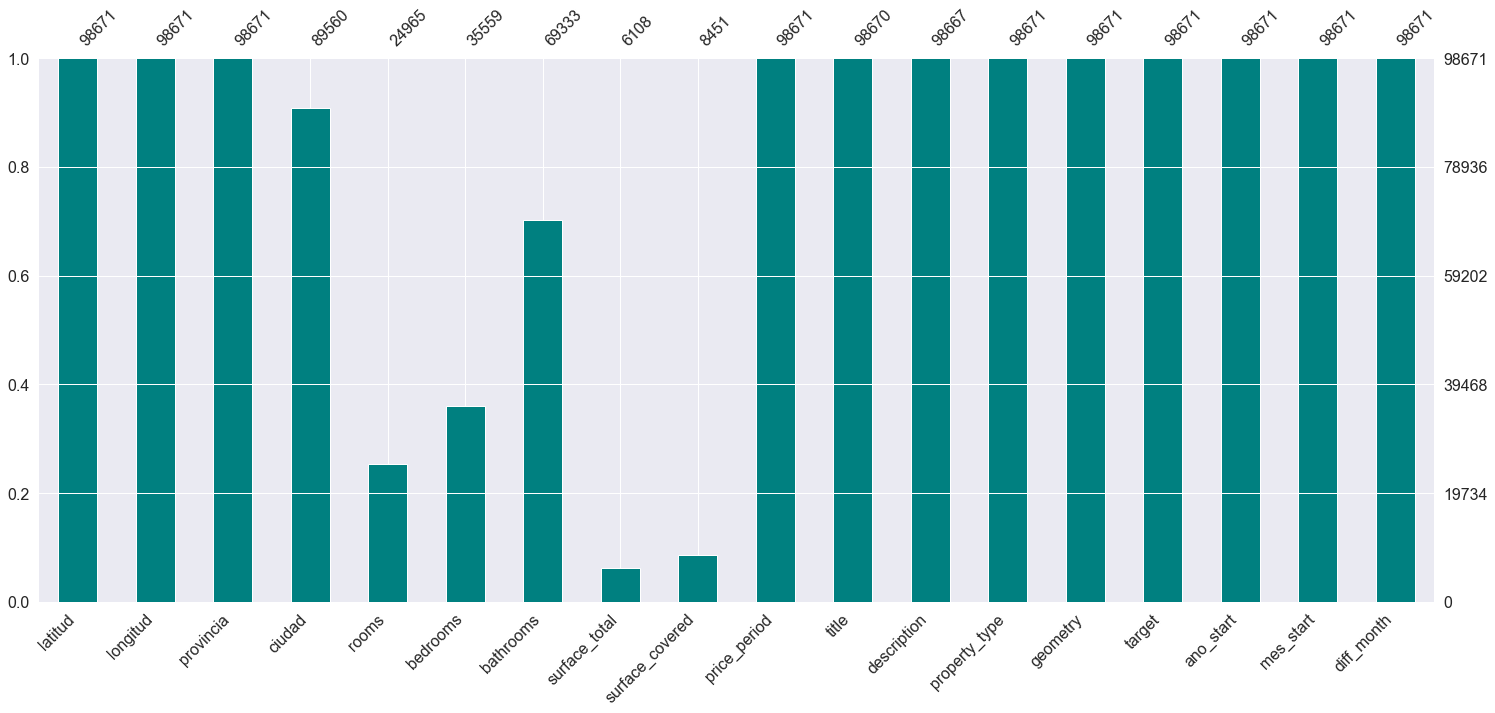

In [876]:
#gráfico de completitud
msno.bar(train,color="teal")
plt.show()

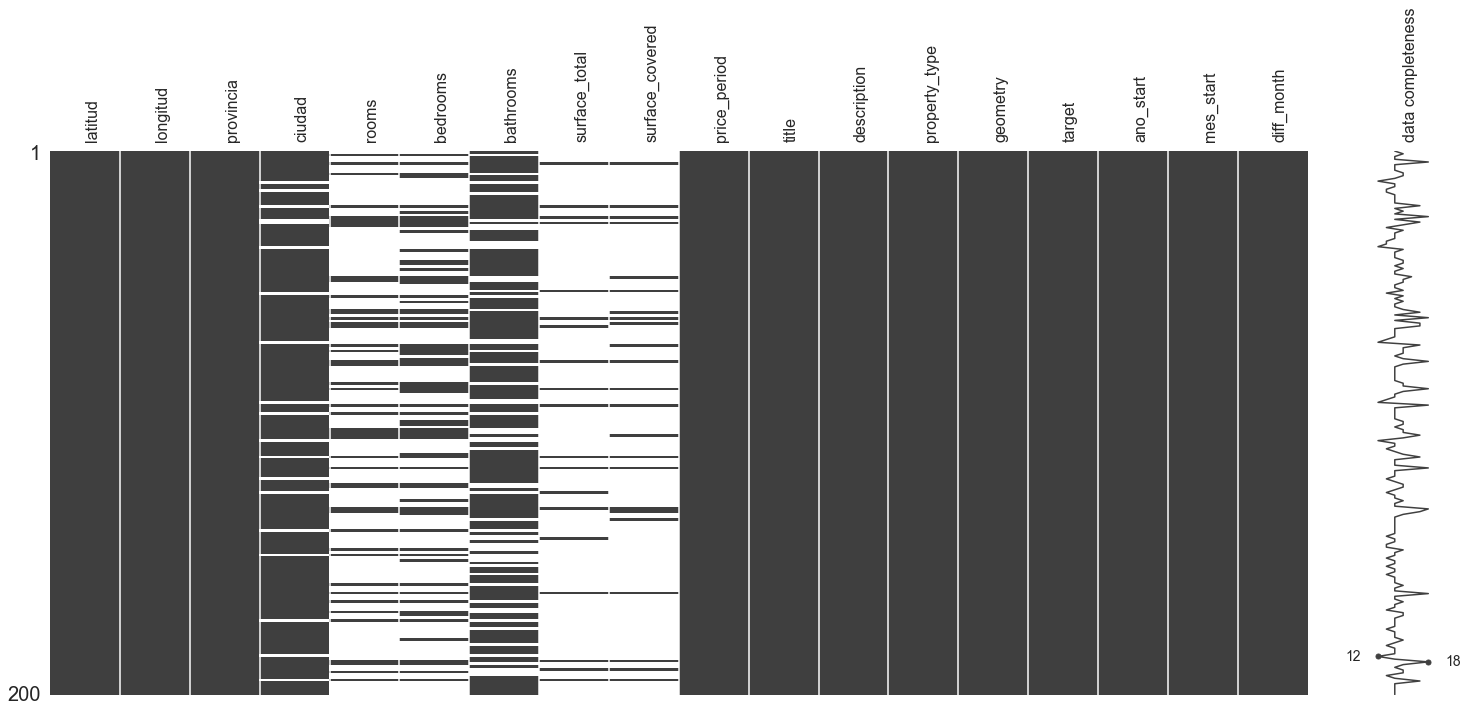

In [877]:
# Tomamos 200 muestras al azar de nuestra población
# te muestra las filas más y menos vacías en el df
msno.matrix(train.sample(200), labels = True, label_rotation = 90)
plt.show()

#### ***'Relleno de valores bath,bed,surf%'***

In [878]:
train.description[56]

'exclusivo y lindo apartamento para la venta amplio iluminado acabados de lujo persianas y black out electricos estudio bar pisos en marmol y  laminado de alta calidad cocina integral con excelentes acabados balcon muy buena vista 5 parqueaderos seguridad 24 horas unicamente el acceso al piso donde se encuentra el apartamento ubicacion estrategica pues ademas de la excelente ubicacion nicolas de federman se caracteriza por ser un sector netamente residencial tranquilo y agradable'

In [879]:
def relleno_bath_bed_sup(train,nombre):
    #Veo la cantidad de nulos que tiene originalmente:
    null=train[train[nombre].isnull()].shape[0]
    print('la cantidad de nulos iniciales para', {nombre},' es ', {null})
    if nombre=='rooms':
        #ESCOJO PATRON A REEMPLAZAR
        pat = r"(\d+\.?\d+(?=habitacion| habitacion|  habitaciones))"
    elif nombre=='bedrooms':
        pat = r"(\d+\.?\d+(?=habitacion| habitacion|  habitaciones))"
    elif nombre=='bathrooms':
        pat = r"(\d+\.?\d+(?=baño| baño|  baño|baños| baños|  baños|bano| bano|  bano|banos| banos|  banos))"
    elif nombre=='surface_total':
        pat = r"(\d+\.?\d+(?=m2| m2|  mts))"
    elif nombre=='surface_covered':
        pat = r"(\d+\.?\d+(?=m2| m2|  mts))"
        
    #FILTRO EL NUMERO QUE ESTA SEGUIDO DE LA CLAVE EN EL PATRON
    #Lo hago para titulo
    mask1 = train.loc[:,'title'].str.extract(pat, expand = False).notna()
    #Lo hago para descripcion
    mask2 = train.loc[:,'description'].str.extract(pat, expand = False).notna()
    #hago un filtro que me atrape los vacios
    mask_na = train[nombre].isna()
    #Relleno los valores en superficie que estan en titulo
    train.loc[mask_na & mask1, nombre] = train.loc[mask_na & mask1, 'title'].str.extract(pat, expand = False)
    #Relleno los valores en superficie que estan en titulo
    train.loc[mask_na & mask2, nombre] = train.loc[mask_na & mask2, 'description'].str.extract(pat, expand = False)
    #veo la cantidad de nulos que tiene quedaron
    null=train[train[nombre].isnull()].shape[0]
    train[nombre]=train[nombre].apply(lambda x: 0 if x=='NaN' else x)
    train[nombre]=train[nombre].astype('float64')
    print('la cantidad de nulos finales para', {nombre},' es ', {null}, train[nombre].dtype)
    return(df)

In [880]:
train=relleno_bath_bed_sup(train,'rooms')
train=relleno_bath_bed_sup(train,'bedrooms')
train=relleno_bath_bed_sup(train,'bathrooms')
train=relleno_bath_bed_sup(train,'surface_total')
train=relleno_bath_bed_sup(train,'surface_covered')

la cantidad de nulos iniciales para {'rooms'}  es  {73706}
la cantidad de nulos finales para {'rooms'}  es  {73440} float64
la cantidad de nulos iniciales para {'bedrooms'}  es  {63112}
la cantidad de nulos finales para {'bedrooms'}  es  {62878} float64
la cantidad de nulos iniciales para {'bathrooms'}  es  {29338}
la cantidad de nulos finales para {'bathrooms'}  es  {29255} float64
la cantidad de nulos iniciales para {'surface_total'}  es  {92563}
la cantidad de nulos finales para {'surface_total'}  es  {65381} float64
la cantidad de nulos iniciales para {'surface_covered'}  es  {90220}
la cantidad de nulos finales para {'surface_covered'}  es  {63415} float64


In [881]:
train.head(1)

,latitud,longitud,provincia,ciudad,sector,rooms,bedrooms,bathrooms,surface_total,surface_covered,price_period,title,description,property_type,geometry,target,ano_start,mes_start,diff_month
0,6.203,-75.572,antioquia,medellin,el poblado,NaN,4.0,4.0,900.0,900.0,NaN,hermosa mansion en el poblado area construida ...,hermosa mansion en el poblado area construida...,casa,point (75572 6203),1,2020,12,25.0


# Relleno de los valores que no pude llenar

#### ***'Relleno de valores por mediana***

In [882]:
#creo una funcion para rellenar nulos
def relleno_vacios_null (df):
    lista=['rooms', 'bedrooms',
       'bathrooms', 'surface_total', 'surface_covered']
    #sacamos los valores por fuera 
    df_mean=df
    df_mean=df_mean
    for c in lista:
        #df_media
        mediana=int(df[c].notna().median())
        if mediana <=1:
            mediana=1
        df[c]=df[c].replace(np.nan,mediana)
        df[c]=df[c].replace(0,mediana)
    lista2=['latitud','longitud']
    #sacamos los valores por fuera 
    df_mean=df
    df_mean=df_mean
    for c in lista2:
        #df_media
        mediana=df[c].notna().mean()
        df[c]=df[c].replace(np.nan,mediana)
        df[c]=df[c].replace(0,mediana)
    return(df)

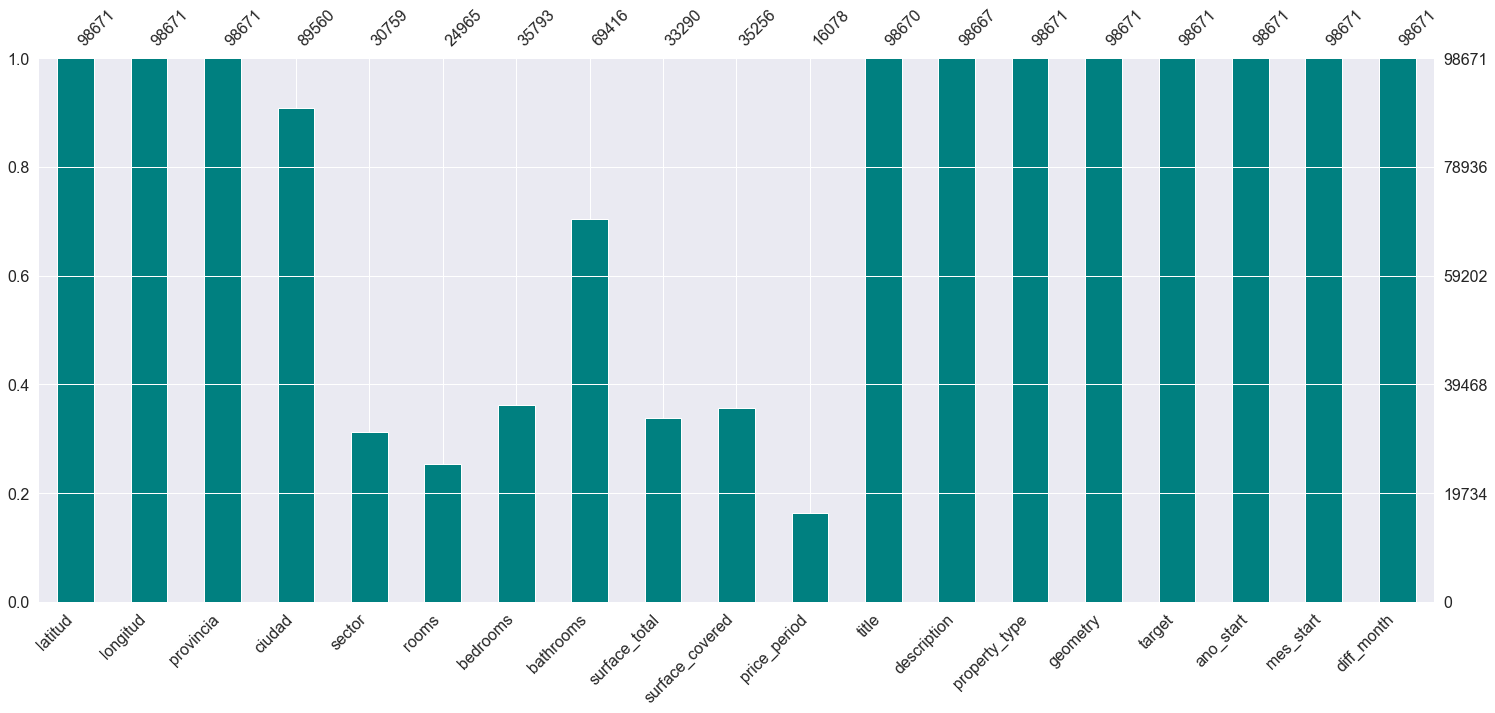

In [883]:
#gráfico de completitud
msno.bar(train ,color="teal")
plt.show()

In [884]:
train=relleno_vacios_null (train)

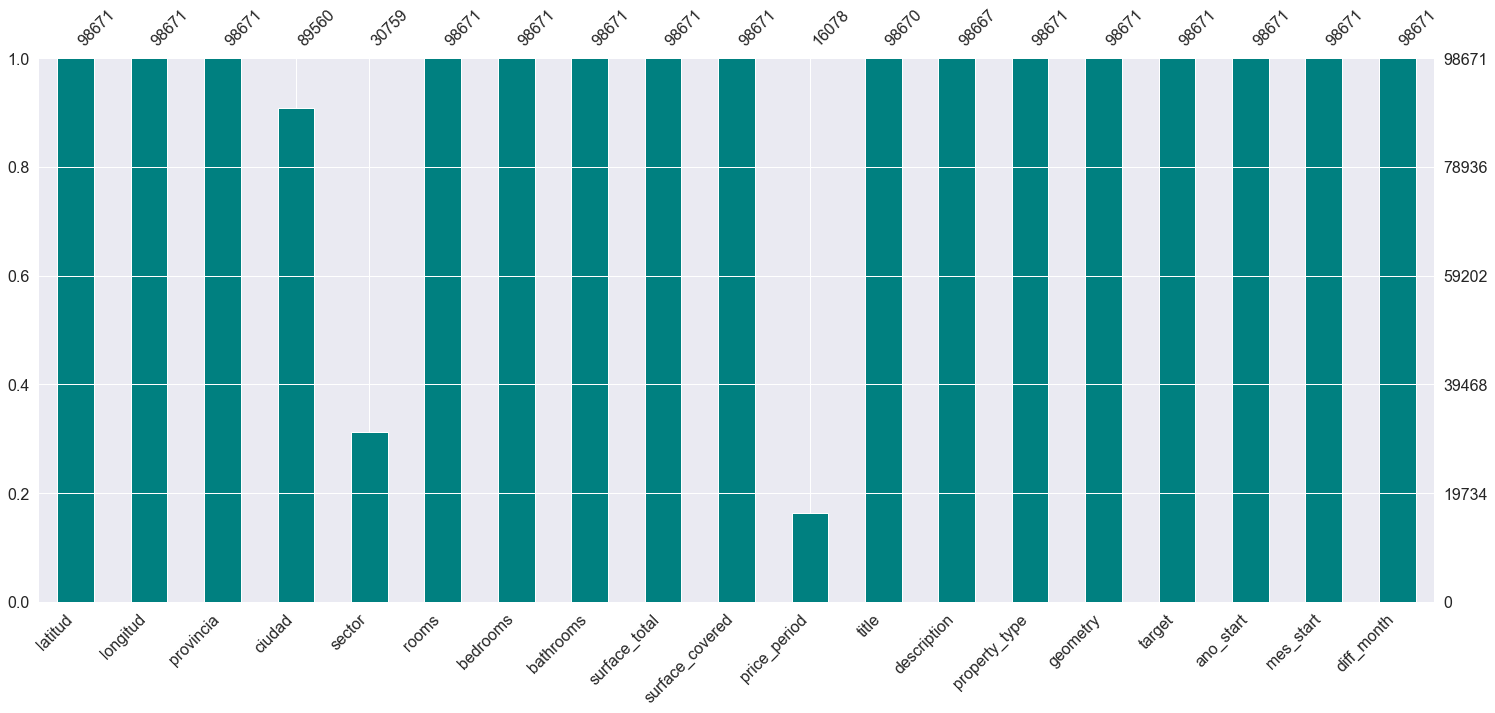

In [885]:
#Verifico con un gráfico de completitud
msno.bar(train, color="teal")
plt.show()

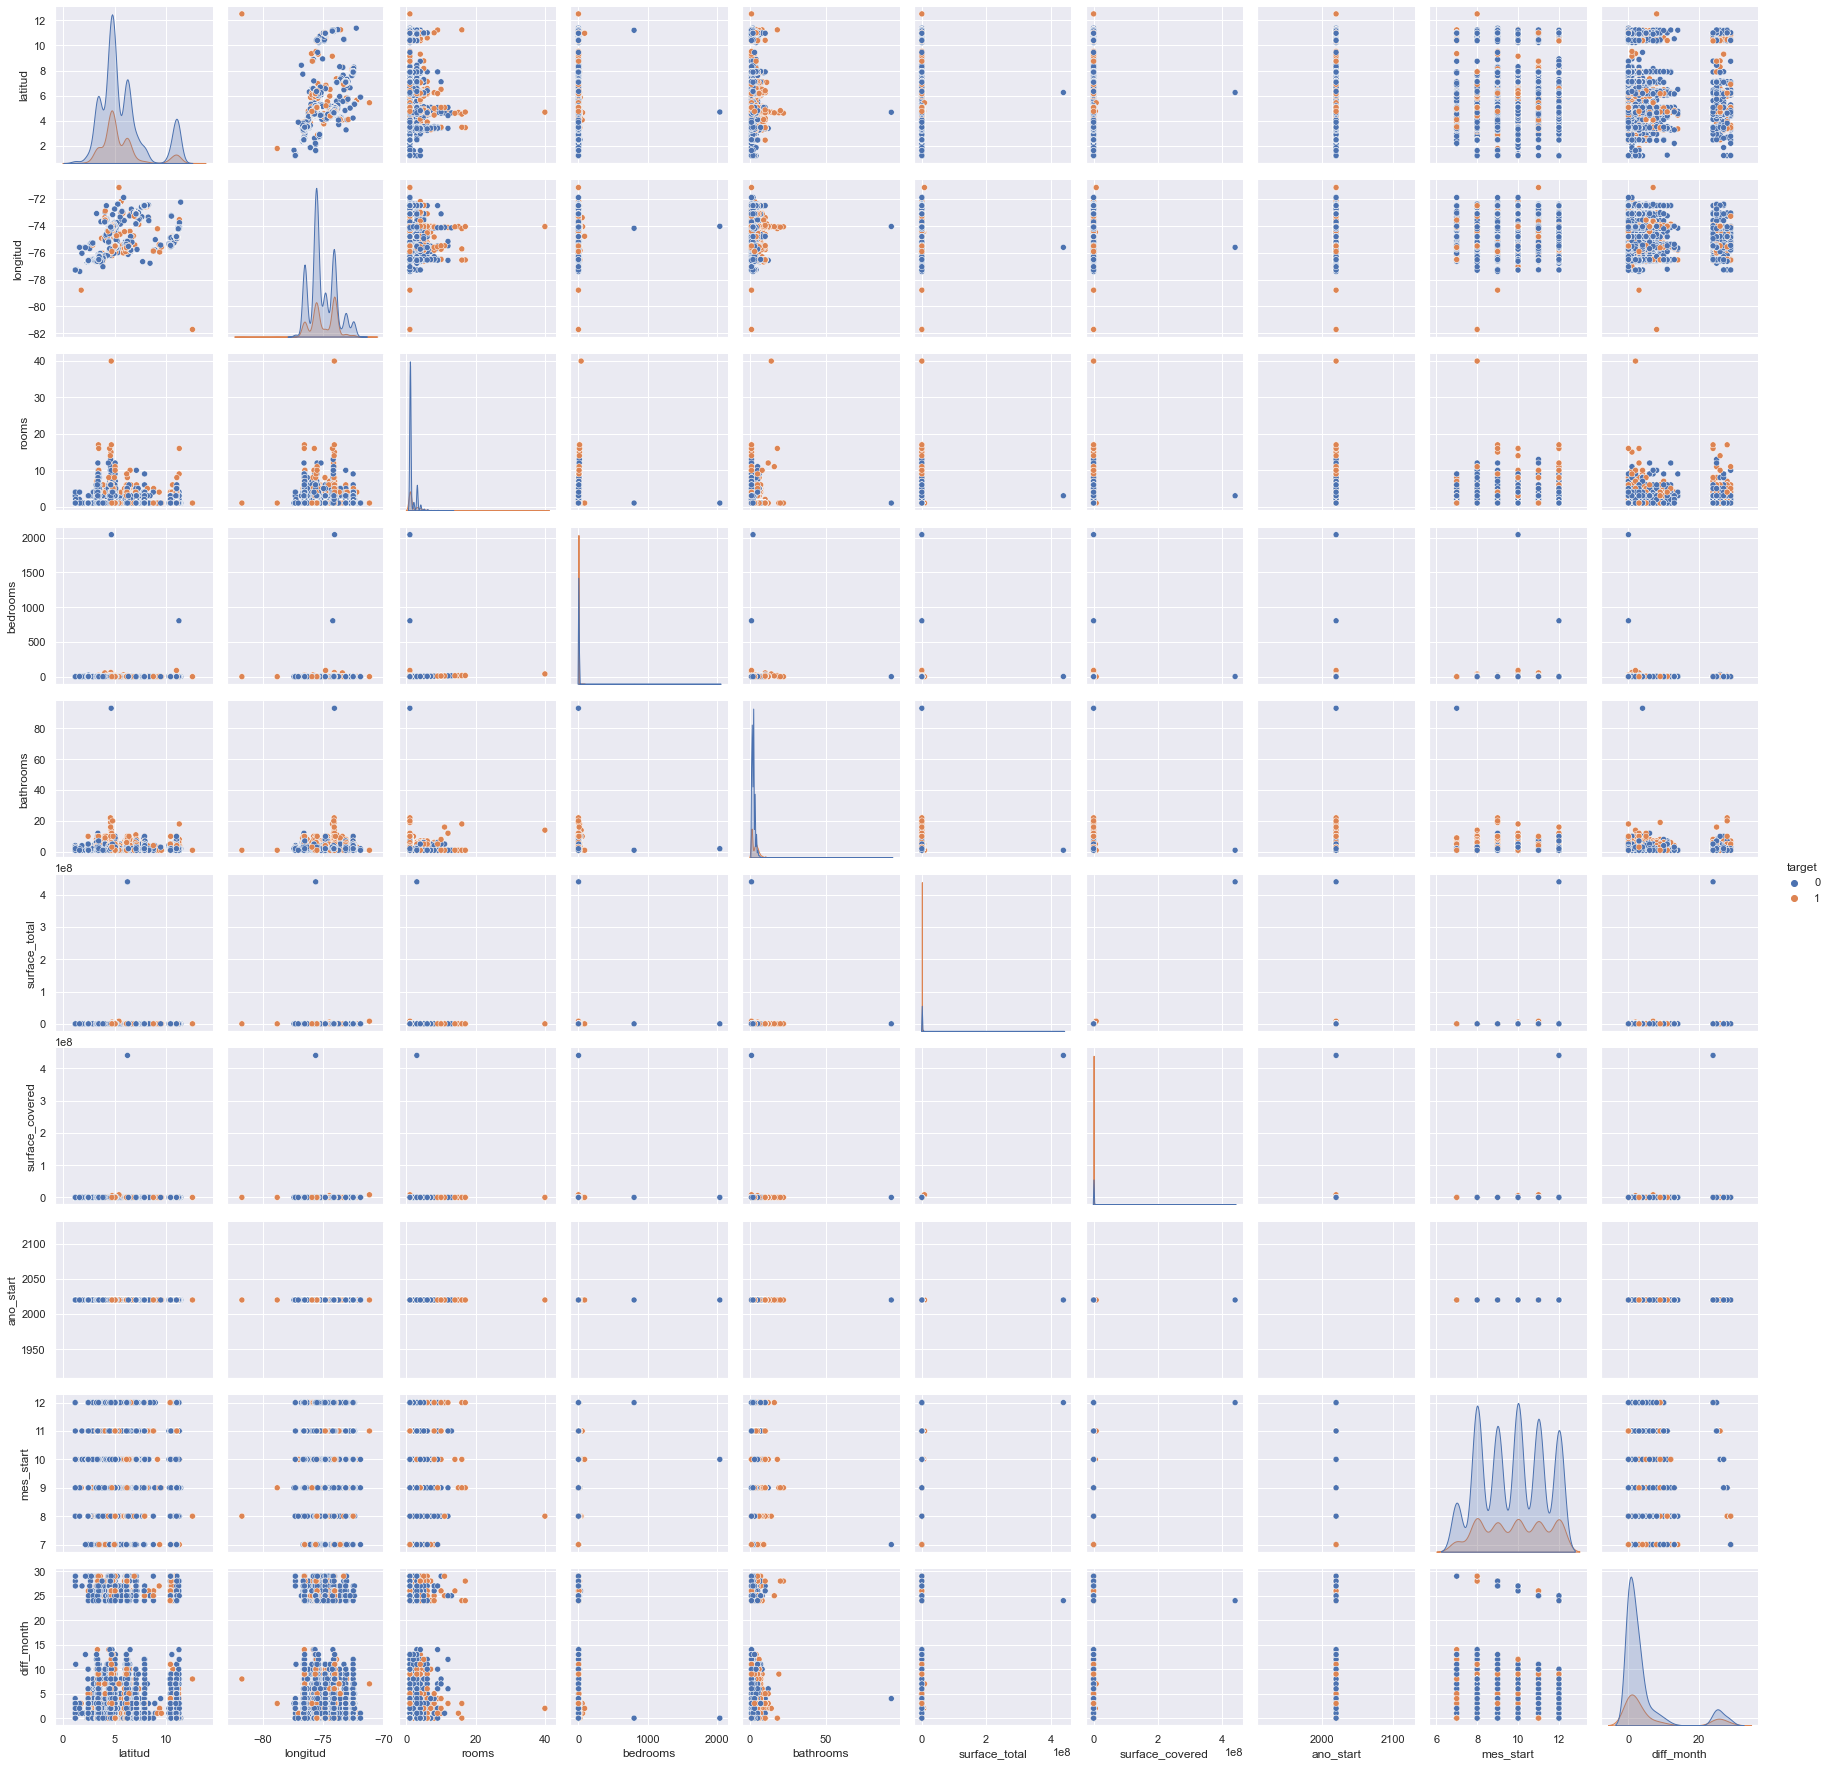

In [886]:
# Hacemos un pairplot para ver la correlación entre las variables
sns.pairplot(train.sample(frac = 0.1), hue = 'target')
plt.show()

In [887]:
#Vemos la correlación entre las variables
dataset_corr = train.corr()
dataset_corr

,latitud,longitud,rooms,bedrooms,bathrooms,surface_total,surface_covered,target,ano_start,mes_start,diff_month
latitud,1.000000,0.318612,-0.060430,-0.004926,-0.000900,0.001114,0.001126,-0.021336,NaN,-0.047011,0.028007
longitud,0.318612,1.000000,-0.047007,-0.005786,-0.001370,-0.001561,-0.001584,0.052398,NaN,0.044093,-0.006604
rooms,-0.060430,-0.047007,1.000000,-0.001618,-0.001388,-0.001261,-0.001252,0.101752,NaN,0.040592,0.191105
bedrooms,-0.004926,-0.005786,-0.001618,1.000000,-0.000017,-0.000018,-0.000018,-0.002576,NaN,-0.005717,-0.002389
bathrooms,-0.000900,-0.001370,-0.001388,-0.000017,1.000000,-0.000011,-0.000011,0.005808,NaN,-0.005661,-0.001045
surface_total,0.001114,-0.001561,-0.001261,-0.000018,-0.000011,1.000000,0.999970,0.005786,NaN,-0.003385,-0.000669
surface_covered,0.001126,-0.001584,-0.001252,-0.000018,-0.000011,0.999970,1.000000,0.005742,NaN,-0.003422,-0.000733
target,-0.021336,0.052398,0.101752,-0.002576,0.005808,0.005786,0.005742,1.000000,NaN,0.017312,0.065267
ano_start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mes_start,-0.047011,0.044093,0.040592,-0.005717,-0.005661,-0.003385,-0.003422,0.017312,NaN,1.000000,0.156908


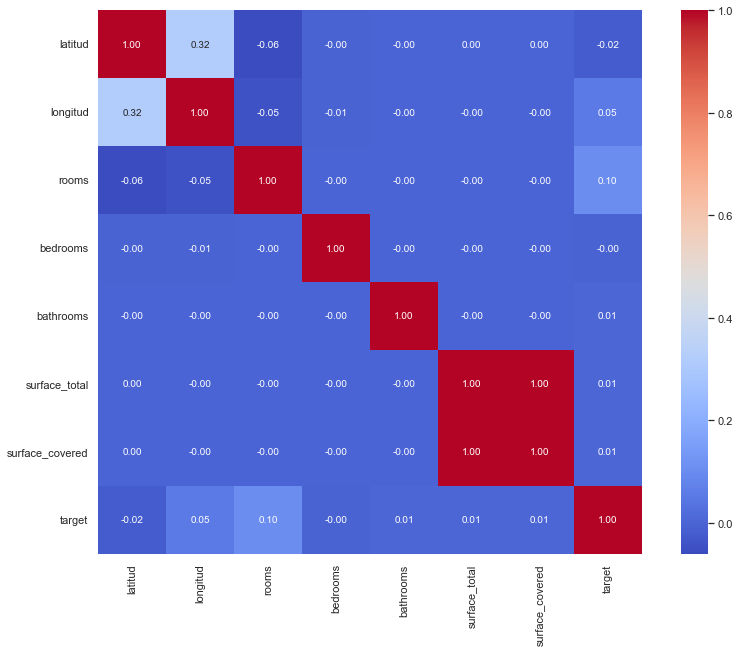

In [888]:
# Hacemos un mapa de calor
lista=['latitud','longitud','rooms', 'bedrooms',
    'bathrooms', 'surface_total', 'surface_covered','target']
corr = train[lista].corr(method='pearson')
plt.figure(figsize=(14,10),edgecolor="teal")
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
           xticklabels= train[lista].columns, 
           yticklabels= train[lista].columns,
           cmap= 'coolwarm')

plt.show()

#### **`4. Detección de outliers`**

In [889]:
train.dtypes

latitud            float64
longitud           float64
provincia           object
ciudad              object
sector              object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price_period        object
title               object
description         object
property_type       object
geometry            object
target               int64
ano_start            int64
mes_start            int64
diff_month         float64
dtype: object

<AxesSubplot:>

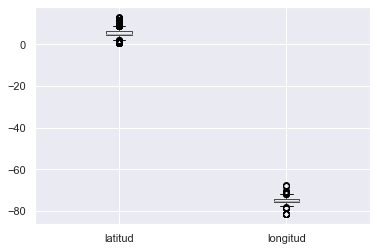

In [890]:
#checking for outliers
train.boxplot(column=[ 'latitud', 'longitud'])

<AxesSubplot:>

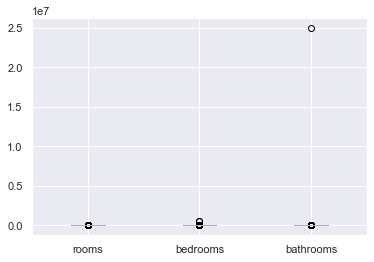

In [891]:
#checking for outliers
train.boxplot(column=[ 'rooms','bedrooms', 'bathrooms'])

<AxesSubplot:>

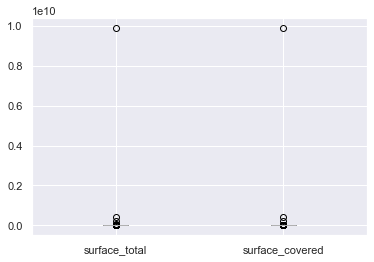

In [892]:
#checking for outliers
train.boxplot(column=[ 'surface_total','surface_covered'])

In [893]:
train.to_csv('antes_outliers.csv')

`Analisis de 'outliers'`

In [894]:
def quitar_ouliers(df=Frame):
    #acomodamos los índices
    df=normalizar_index(df)
    #columnas que vamos a tratar
    lista=['latitud','longitud','rooms', 'bedrooms','bathrooms', 'surface_total', 'surface_covered']
    #lista donde vamos a guardar los resultados obtenidos
    indices_borrar=[]
    nombre_columna=[]
    cantidad_registros_iniciales=[]
    valor_minimo=[]
    valor_maximo=[]
    primer_cuartil=[]
    segundo_cuartil=[]
    rango_intercuartil=[]
    bigote_inferior=[]
    bigote_superior=[]
    cantidad_outliers=[]
    porcentaje_outliers=[]
    for c in df[lista].columns:
        indices=[]
        #guardo el nombre de la columna
        nombre_columna.append(c)
        #EVALUAMOS LAS CONDICIONES INICIALES ANTES DE SACAR OUTLIERS    
        cantidad_registros_iniciales.append( df.shape[0])
        #plotiamos el el boxplot
        #sns.boxplot(x = df[c], data = df)
        #plt.show()
        # Verificamos si hay inconsistencias. 
        #valor minimo
        valor_minimo.append(df[c].min())
        #valor max
        valor_maximo.append(df[c].max())
        #cálculo de cuartiles
        Q1 = df[c].quantile(0.25)
        Q3 = df[c].quantile(0.75)
        #rango intercuartil
        IQR = Q3 - Q1
        #ver como es colo los bigotes inferior y superior
        BI = Q1 - 1.5*IQR
        BS = Q3 + 1.5*IQR
        #agrego los valores a un df
        #valor primer cuartil:
        primer_cuartil.append(round(Q1,2))
        #valor segundo cuartil:
        segundo_cuartil.append(round(Q3,2))
        #rango intercuartil:
        rango_intercuartil.append(round(IQR,2))
        #bigotes
        bigote_inferior.append(round(BI,2))
        bigote_superior.append(round(BS,2))
        #cantidad de outliers
        cantidad_outliers.append( df[(df[c]<BI) | (df[c]>BS)].shape[0] )
        #porcentaje que representan del total
        porcentaje_outliers.append(( df[(df[c]<BI) | (df[c]>BS)].shape[0] )/df.shape[0]*100)
        #creo una lista con los índices que debo borrar
        indices=list(df[(df[c]<BI) | (df[c]>BS)].index)
        #le agrego los indices a la lista de los indices a borrar
        for i in indices:
            if i not in indices_borrar:
                indices_borrar.append(i)
        #Grafico el nuevo boxplot:
        #sns.boxplot(x = df[c], data = df)
        #plt.show()
    diagnostico_outliers=pd.DataFrame()
    diagnostico_outliers['nombre_columna']=nombre_columna
    diagnostico_outliers['cant_registros_iniciales']=cantidad_registros_iniciales
    diagnostico_outliers['valor_minimo']=valor_minimo
    diagnostico_outliers['valor_maximo']=valor_maximo
    diagnostico_outliers['primer_cuartil']=primer_cuartil
    diagnostico_outliers['segundo_cuartil']=segundo_cuartil
    diagnostico_outliers['rango_intercuartil']=rango_intercuartil
    diagnostico_outliers['bigote_inferior']=bigote_inferior
    diagnostico_outliers['bigote_superior']=bigote_superior
    diagnostico_outliers['cant_outliers']=cantidad_outliers
    diagnostico_outliers['%_outliers']=porcentaje_outliers
    
    display(diagnostico_outliers)
    out_df=df.iloc[indices_borrar]
    df= df.drop( index=indices_borrar)
    df=normalizar_index(df) 
    return(df)     

In [895]:
train=quitar_ouliers(train)

,nombre_columna,cant_registros_iniciales,valor_minimo,valor_maximo,primer_cuartil,segundo_cuartil,rango_intercuartil,bigote_inferior,bigote_superior,cant_outliers,%_outliers
0,latitud,98671,0.823972,1.335192e+01,4.59,6.24,1.65,2.11,8.72,11404,11.557601
1,longitud,98671,-81.728390,-6.748257e+01,-75.65,-74.10,1.55,-77.97,-71.78,33,0.033444
2,rooms,98671,1.000000,4.000000e+01,1.00,1.00,0.00,1.00,1.00,23523,23.839831
3,bedrooms,98671,1.000000,5.000000e+05,1.00,3.00,2.00,-2.00,6.00,1657,1.679318
4,bathrooms,98671,1.000000,2.500000e+07,1.00,3.00,2.00,-2.00,6.00,1613,1.634726
5,surface_total,98671,1.000000,9.898105e+09,1.00,80.00,79.00,-117.50,198.50,14462,14.656789
6,surface_covered,98671,1.000000,9.898105e+09,1.00,86.00,85.00,-126.50,213.50,13937,14.124717


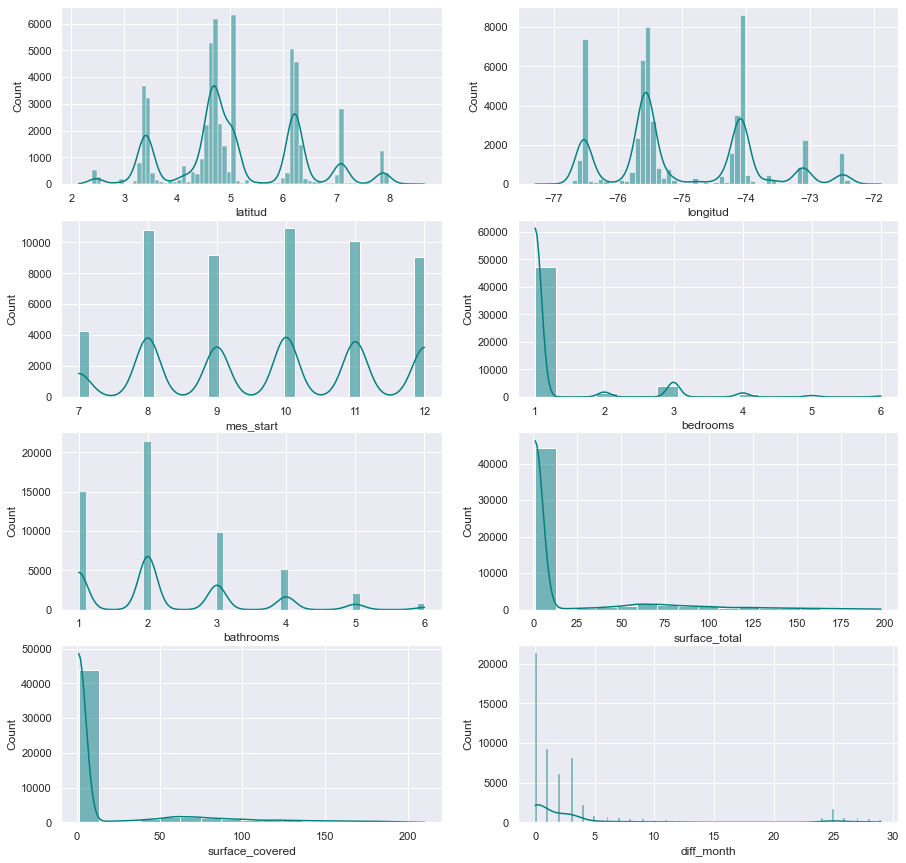

In [896]:
#checking for outliers
sns.set(style="darkgrid")

fig, axs = plt.subplots(4, 2, figsize=(15, 15))
sns.histplot(data=train, x='latitud', kde=True, color="teal", ax=axs[0, 0])
sns.histplot(data=train, x='longitud', kde=True, color="teal", ax=axs[0, 1])
sns.histplot(data=train, x='mes_start', kde=True, color="teal", ax=axs[1, 0])
sns.histplot(data=train, x='bedrooms', kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=train, x='bathrooms', kde=True, color="teal", ax=axs[2,0])
sns.histplot(data=train, x='surface_total', kde=True, color="teal", ax=axs[2, 1])
sns.histplot(data=train, x='surface_covered', kde=True, color="teal", ax=axs[3, 0])
sns.histplot(data=train, x='diff_month', kde=True, color="teal", ax=axs[3, 1])

plt.show()

In [897]:
train.drop('rooms',axis=1,inplace=True)
train.drop('ano_start',axis=1,inplace=True)

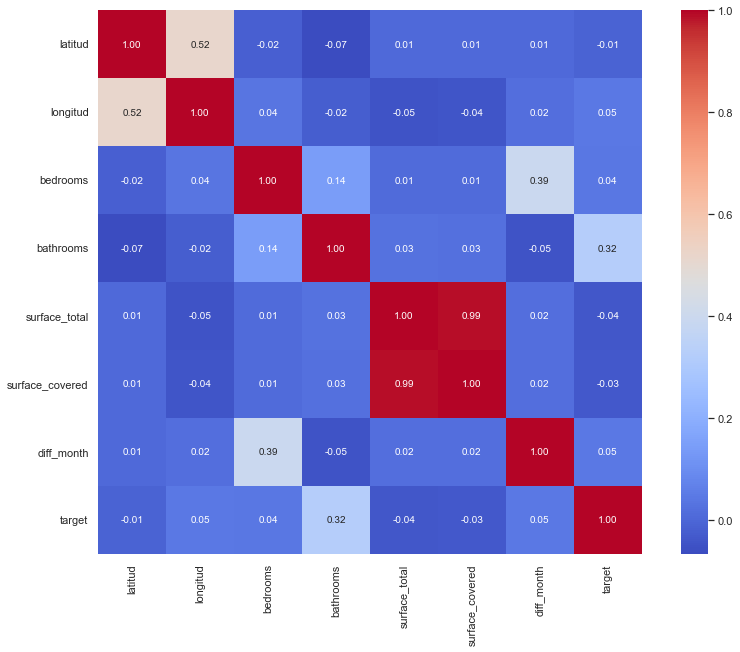

In [898]:
# Hacemos un mapa de calor
lista=['latitud','longitud', 'bedrooms',
    'bathrooms', 'surface_total', 'surface_covered','diff_month','target']
corr = train[lista].corr(method='pearson')
plt.figure(figsize=(14,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
           xticklabels= train[lista].columns, 
           yticklabels= train[lista].columns,
           cmap= 'coolwarm')

plt.show()

In [899]:
#restablecemos los índices
train=normalizar_index(train)

In [900]:
#Vemos la correlación entre las variables
dataset_corr = train.corr()
dataset_corr

,latitud,longitud,bedrooms,bathrooms,surface_total,surface_covered,target,mes_start,diff_month
latitud,1.000000,0.515063,-0.017171,-0.065386,0.008179,0.006549,-0.008934,-0.030294,0.005504
longitud,0.515063,1.000000,0.037414,-0.023583,-0.047442,-0.041638,0.045400,0.045315,0.019747
bedrooms,-0.017171,0.037414,1.000000,0.143164,0.012901,0.010158,0.042254,0.209236,0.394595
bathrooms,-0.065386,-0.023583,0.143164,1.000000,0.029623,0.025406,0.321854,0.012082,-0.047110
surface_total,0.008179,-0.047442,0.012901,0.029623,1.000000,0.989619,-0.037905,-0.020468,0.021003
surface_covered,0.006549,-0.041638,0.010158,0.025406,0.989619,1.000000,-0.034563,-0.019399,0.020707
target,-0.008934,0.045400,0.042254,0.321854,-0.037905,-0.034563,1.000000,0.031500,0.046229
mes_start,-0.030294,0.045315,0.209236,0.012082,-0.020468,-0.019399,0.031500,1.000000,0.163255
diff_month,0.005504,0.019747,0.394595,-0.047110,0.021003,0.020707,0.046229,0.163255,1.000000


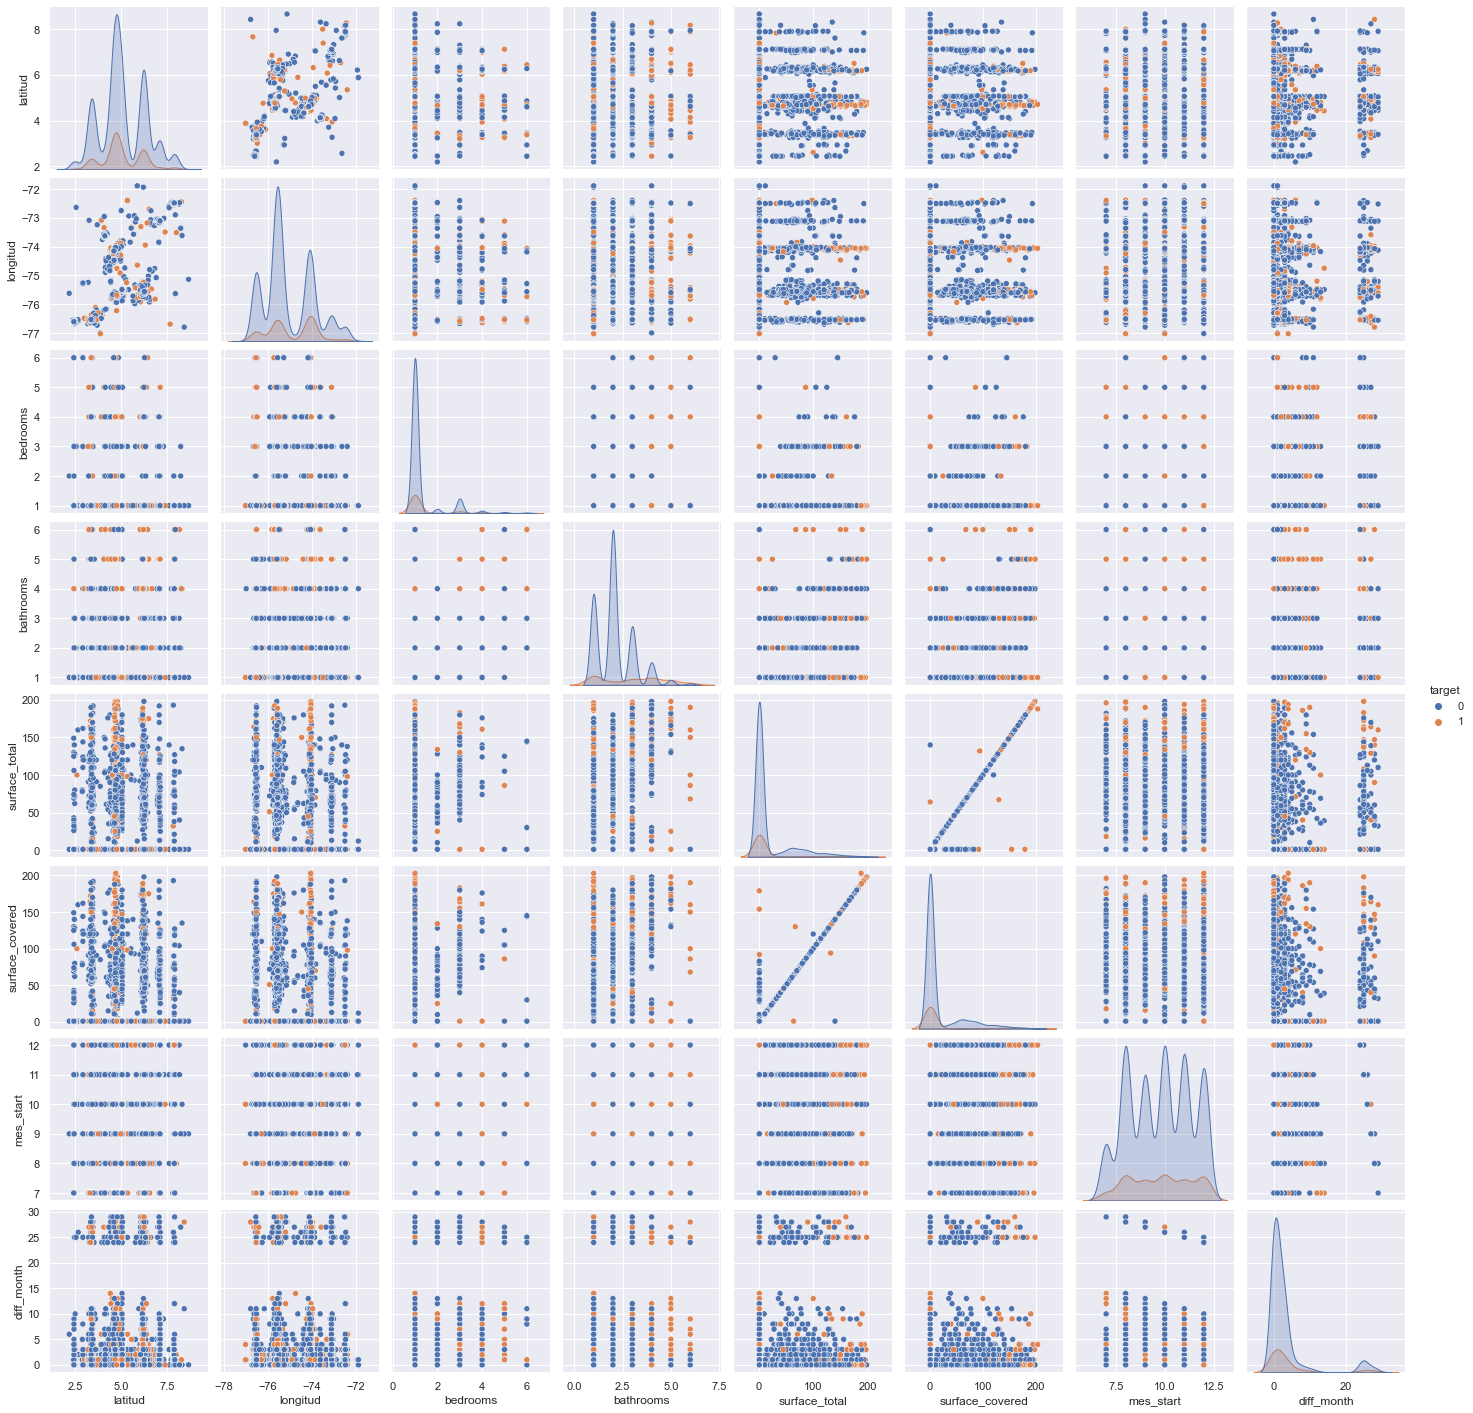

In [901]:
# Hacemos un pairplot para ver la correlación entre las variables
sns.pairplot(train.sample(frac = 0.1), hue = 'target')
plt.show()

In [902]:
#descartamos variables
train.drop('surface_total',axis=1,inplace=True)

# Pasar a binarios

Debemos convertir a hotencoder:
* period
* rooms	
* bedrooms	
* bathrooms	
* surface_total	
* surface_covered	
* property_type	


In [903]:
recover_df=train

In [904]:
train['price_period'].unique()

array([nan, 'mensual'], dtype=object)

In [905]:
train.price_period.replace('mensual',1,inplace=True)

In [906]:
train.price_period.fillna(0,inplace=True)

In [907]:
train.price_period.astype('int32')

0        0
1        0
2        0
3        1
4        0
        ..
54375    1
54376    0
54377    0
54378    1
54379    0
Name: price_period, Length: 54380, dtype: int32

In [908]:
train.property_type.unique()

array(['apartamento', 'casa', 'oficina', 'otro', 'lote',
       'local comercial', 'finca', 'parqueadero'], dtype=object)

In [909]:
train[train.property_type=='otro']

,latitud,longitud,provincia,ciudad,sector,bedrooms,bathrooms,surface_covered,price_period,title,description,property_type,geometry,target,mes_start,diff_month
8,4.677321,-74.052634,cundinamarca,bogota dc,zona chapinero,1.0,2.0,1.0,0.0,oficina en venta en chico norte ii bogota sim...,6382495 gran oportunidad espectacular venta de...,otro,point (74052634 46773213),1,8,0.0
16,6.061000,-75.502998,antioquia,NaN,NaN,1.0,1.0,1.0,1.0,lote en venta en el retiro,se vende lote con hermosa vista a las montañas...,otro,point (7550299835 606099987),0,8,0.0
35,4.691000,-74.075000,cundinamarca,bogota dc,zona noroccidental,1.0,2.0,1.0,0.0,bodega en arriendo/venta en bogota la floresta...,excelente bodega estrategicamente ubicada en e...,otro,point (74075 4691),1,11,0.0
39,6.207858,-75.553660,antioquia,medellin,el poblado,1.0,3.0,1.0,1.0,codigo pr 9893 venta de local ubicado por pobl...,pr9893 local para uso comercial en el sector d...,otro,point (7555365986 62078578),1,12,0.0
44,5.065382,-75.478950,caldas,manizales,NaN,1.0,3.0,1.0,0.0,venta de casa con renta en villa luz wasi1909116,amplia y comoda casa con 3 viviendas independi...,otro,point (7547894955 506538153),0,7,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54298,4.642675,-74.062258,cundinamarca,bogota dc,zona chapinero,1.0,5.0,1.0,1.0,3593 local comercial en venta,amplio local comercial ubicado sobre la carrer...,otro,point (74062258 4642675),1,11,0.0
54325,3.263000,-76.539000,valle del cauca,jamundi,NaN,1.0,1.0,33.0,0.0,local en venta en jamundi centro comercial cañ...,se vende local para estrenar en el nuevo centr...,otro,point (76539 3263),0,11,0.0
54342,6.173106,-75.337885,antioquia,marinilla,NaN,1.0,3.0,1.0,1.0,c1487 finca vereda la esperanza,venta de finca vereda la esperanza 13000 mts d...,otro,point (753378851 61731064),0,10,0.0
54343,3.685097,-76.312999,valle del cauca,cali,NaN,5.0,3.0,1.0,0.0,finca en venta caliel cerrito,venta finca recreativa en cerrito,otro,point (76312999 3685097),1,10,0.0


In [910]:
train.property_type.replace('finca','otro',inplace=True)

In [911]:
train.property_type.replace('parqueadero','otro',inplace=True)

In [912]:
#Pasamos a dummies la columna de period
#pd.get_dummies(train)
#Agregamos al df
train= pd.concat([train, pd.get_dummies(train['property_type'])], axis=1)
train.head(2)

,latitud,longitud,provincia,ciudad,sector,bedrooms,bathrooms,surface_covered,price_period,title,...,geometry,target,mes_start,diff_month,apartamento,casa,local comercial,lote,oficina,otro
0,4.722748,-74.073115,cundinamarca,bogota dc,zona noroccidental,3.0,2.0,122.0,0.0,apartamento en venta bogotaciudad jardin norte,...,point (740731146 47227485),0,9,8.0,1,0,0,0,0,0
1,4.709000,-74.030000,cundinamarca,bogota dc,zona norte,1.0,2.0,1.0,0.0,apartamento en venta en bogota bella suiza cod...,...,point (7403 4709),0,8,0.0,0,1,0,0,0,0


In [913]:
train.drop('otro',axis=1,inplace=True)

In [914]:
train.drop('property_type',axis=1,inplace=True)

In [915]:
train.describe().round(2)

,latitud,longitud,bedrooms,bathrooms,surface_covered,price_period,target,mes_start,diff_month,apartamento,casa,local comercial,lote,oficina
count,54380.00,54380.00,54380.00,54380.00,54380.00,54380.0,54380.00,54380.00,54380.00,54380.0,54380.00,54380.00,54380.00,54380.00
mean,5.08,-75.02,1.28,2.27,17.92,0.2,0.17,9.72,3.36,0.5,0.32,0.01,0.07,0.01
std,1.21,1.12,0.80,1.17,39.20,0.4,0.38,1.56,6.58,0.5,0.47,0.12,0.26,0.11
min,2.14,-77.29,1.00,1.00,1.00,0.0,0.00,7.00,0.00,0.0,0.00,0.00,0.00,0.00
25%,4.57,-75.63,1.00,1.00,1.00,0.0,0.00,8.00,0.00,0.0,0.00,0.00,0.00,0.00
50%,4.81,-75.49,1.00,2.00,1.00,0.0,0.00,10.00,1.00,1.0,0.00,0.00,0.00,0.00
75%,6.18,-74.07,1.00,3.00,1.00,0.0,0.00,11.00,3.00,1.0,1.00,0.00,0.00,0.00
max,8.67,-71.89,6.00,6.00,210.00,1.0,1.00,12.00,29.00,1.0,1.00,1.00,1.00,1.00


In [916]:
train=normalizar_index(train)

In [917]:
#convertir a binarios rangos de números
def binning(df,column,column_bin):
    df['bin'] = pd.qcut(df[column], q=4)
    df[column_bin] = df['bin'].cat.codes
    df[column_bin] = df[column_bin].map({0:1,1:2,2:3,3:4})
    df.drop(columns='bin', inplace=True)
    return df
#separar baños en rangos
train['bathrooms'] = pd.cut(x = train['bathrooms'],
                                        bins=[0-1,1,4,6+1], 
                                        labels=[0, 2,5])

#separar superficie en rangos
train['surface_covered'] = pd.cut(x = train['surface_covered'],
                                        bins=[0,39,70,110,211], 
                                        labels=[0, 1,2,3])



In [918]:
train.drop('provincia',axis=1,inplace=True)

In [919]:
train.drop('sector',axis=1,inplace=True)

In [920]:
train.head()

,latitud,longitud,ciudad,bedrooms,bathrooms,surface_covered,price_period,title,description,geometry,target,mes_start,diff_month,apartamento,casa,local comercial,lote,oficina
0,4.722748,-74.073115,bogota dc,3.0,2,3,0.0,apartamento en venta bogotaciudad jardin norte,venta apartamento en piso 16 con vista exterio...,point (740731146 47227485),0,9,8.0,1,0,0,0,0
1,4.709000,-74.030000,bogota dc,1.0,2,0,0.0,apartamento en venta en bogota bella suiza cod...,al entrar a este bonito apartamento interior e...,point (7403 4709),0,8,0.0,0,1,0,0,0
2,5.049009,-75.506802,manizales,1.0,2,0,0.0,venta apartamento en via panamericana manizale...,nos complace ofrecer este excelente proyecto u...,point (7550680161 504900894),0,12,3.0,1,0,0,0,0
3,3.447725,-76.490886,cali,1.0,2,0,1.0,venta casa nueva base,casa bifamiliar esquinera en pasaje cerca a ca...,point (764908855 34477248),0,10,1.0,0,1,0,0,0
4,5.093294,-75.531532,manizales,1.0,2,2,0.0,venta apartamento conjunto villapilar via ver...,te ofrecemos confortable apartamento en el sec...,point (755315319 50932942),0,12,1.0,1,0,0,0,0


In [921]:
train.drop('ciudad',axis=1,inplace=True)
train.drop('title',axis=1,inplace=True)
train.drop('description',axis=1,inplace=True)
train.drop('geometry',axis=1,inplace=True)

#### ***`5. Predicciones con modelo de entrenamiento`***

In [922]:
train.columns

Index(['latitud', 'longitud', 'bedrooms', 'bathrooms', 'surface_covered',
       'price_period', 'target', 'mes_start', 'diff_month', 'apartamento',
       'casa', 'local comercial', 'lote', 'oficina'],
      dtype='object')

##### *`5.1 Elegimos variables de entrenamiento`*

In [923]:
train.dropna(how='any',inplace=True)
train=normalizar_index(train)
X =train.drop('target',axis=1)
y = train.target

In [924]:
#Importamos librerias
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.tree import DecisionTreeClassifier

import sklearn.metrics as metrics
from sklearn.model_selection import learning_curve

##### *`5.2 Elegimos que siempre sea barato o caro y medimos su exactitud`*

In [925]:
#Todos baratos
y_pred = np.zeros(y.shape)
accuracy_ceros = metrics.accuracy_score(y,y_pred)
print(round(accuracy_ceros,2))

0.83


In [926]:
#Todos Caros=Uno
y_pred = np.ones(y.shape)
accuracy_unos = metrics.accuracy_score(y,y_pred)
print(accuracy_unos)

0.17022802500919457


##### *`5.3 Predecimos con Random Forest`*

In [927]:
from sklearn.ensemble import RandomForestClassifier

In [928]:
normalizar_index

<function __main__.normalizar_index(df)>

In [929]:
#Separamos las variables en test y train (siempre dentro del df train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify = y)

Investigamos sus parámetros: n_estimators,max_features y obb_score

In [930]:
clf = RandomForestClassifier(n_estimators=200, max_features='sqrt', n_jobs=-1, oob_score = True, random_state = 42)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, oob_score=True,
                       random_state=42)

Evaluamos su desempeño en el conjunto train y test

In [931]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

0.9940104029842904
0.8765477503984308


Obtenemos su obb_score

In [932]:
clf.oob_score

True

Tenemos sus features_importances

In [933]:
clf.oob_score_

0.8745074344559449

Graficamos los features importances

c:\Users\Gise\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


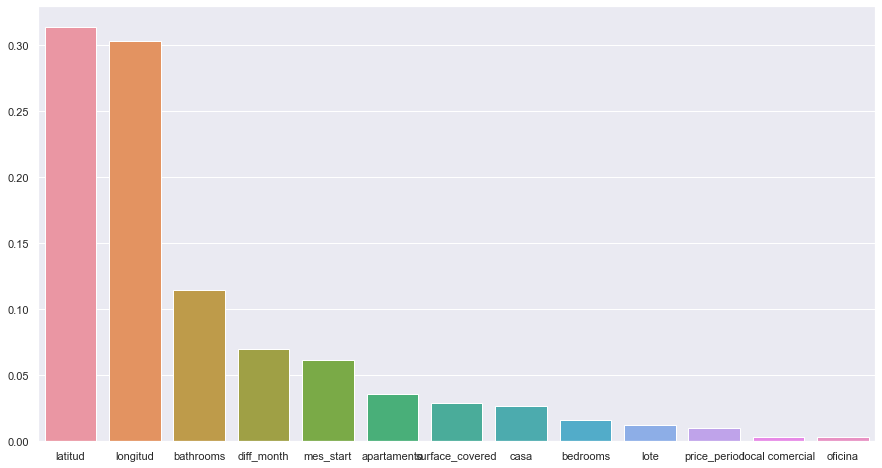

In [934]:
importances = clf.feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (15,8))
sns.barplot(columns[indices], importances[indices])
plt.show()

Vemos estimators

In [935]:
clf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1608637542),
 DecisionTreeClassifier(max_features='sqrt', random_state=1273642419),
 DecisionTreeClassifier(max_features='sqrt', random_state=1935803228),
 DecisionTreeClassifier(max_features='sqrt', random_state=787846414),
 DecisionTreeClassifier(max_features='sqrt', random_state=996406378),
 DecisionTreeClassifier(max_features='sqrt', random_state=1201263687),
 DecisionTreeClassifier(max_features='sqrt', random_state=423734972),
 DecisionTreeClassifier(max_features='sqrt', random_state=415968276),
 DecisionTreeClassifier(max_features='sqrt', random_state=670094950),
 DecisionTreeClassifier(max_features='sqrt', random_state=1914837113),
 DecisionTreeClassifier(max_features='sqrt', random_state=669991378),
 DecisionTreeClassifier(max_features='sqrt', random_state=429389014),
 DecisionTreeClassifier(max_features='sqrt', random_state=249467210),
 DecisionTreeClassifier(max_features='sqrt', random_state=1972458954),
 DecisionTreeC

Elegimos uno de los estimators y evaluamos su desempeño sobre train y test

In [936]:
clf_tree = clf.estimators_[50]
clf_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1224821422,
 'splitter': 'best'}

Medimos el acuracy de test y de trein

In [937]:
y_train_pred = clf_tree.predict(X_train)
y_test_pred = clf_tree.predict(X_test)
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

0.936820259549204
0.835233541743288


c:\Users\Gise\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\Gise\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Hacemos la curva de validación/complejidad del modelo Tandom Forest en función del número de estimadores

In [938]:
train_accuracy = []
test_accuracy = []
oob_scores = []

N_estimadores = [2,10,50,100,150]#,10,25,50,100,250,500,1000]
for estimadores in N_estimadores:
    print(estimadores)
    clf = RandomForestClassifier(n_estimators=estimadores, n_jobs=-1, oob_score= True, random_state = 42)
    clf.fit(X_train,y_train)
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    train_accuracy.append(metrics.accuracy_score(y_train, y_train_pred))
    test_accuracy.append(metrics.accuracy_score(y_test, y_test_pred))
    oob_scores.append(clf.oob_score_)
    
train_accuracy = np.array(train_accuracy)
test_accuracy = np.array(test_accuracy)
oob_scores = np.array(oob_scores)

2
10


c:\Users\Gise\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\Gise\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


50
100
150


Plotiamos la curva de validación

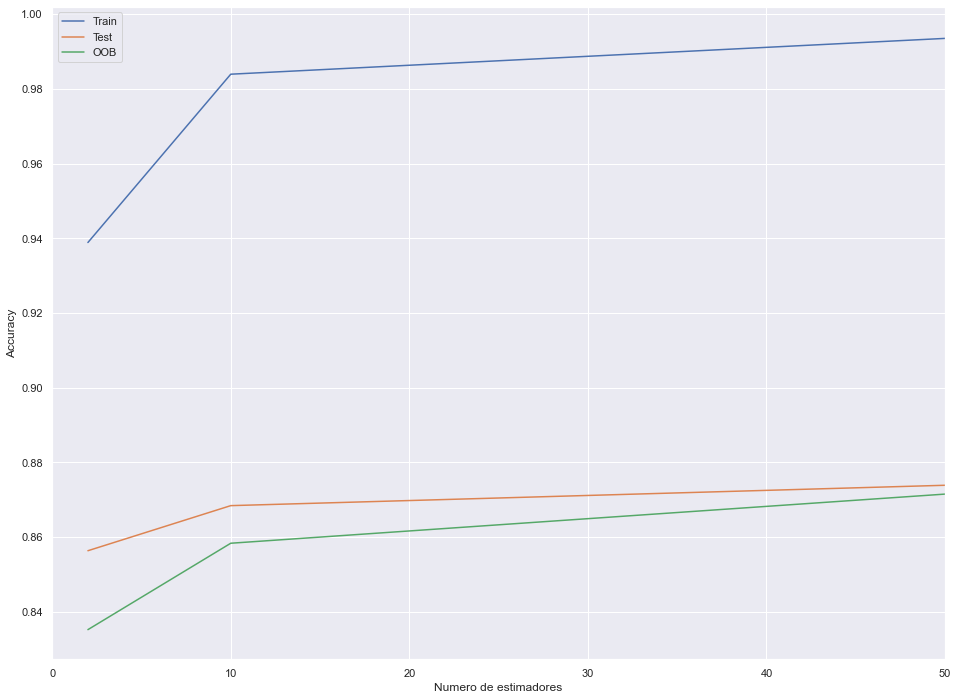

In [939]:
plt.figure(figsize = (16,12))
plt.plot(N_estimadores, train_accuracy, label = 'Train')
plt.plot(N_estimadores, test_accuracy, label = 'Test')
plt.plot(N_estimadores, oob_scores, label = 'OOB')
plt.xlabel('Numero de estimadores')
plt.ylabel('Accuracy')
plt.legend()
plt.xlim(0,50)
plt.show()

Hacemos una curva de aprendizaje

In [940]:
clf = RandomForestClassifier(n_estimators=15, n_jobs=-1, oob_score= True, random_state = 42)

train_sizes, train_scores, valid_scores = learning_curve(clf, X_train, y_train, 
                                                         train_sizes = np.linspace(0.0001,1,10),
                                                         scoring = 'accuracy', cv=5)

c:\Users\Gise\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\Gise\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\Gise\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\Gise\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\Gise\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably me

Plotiamos los resultados obtenidos 

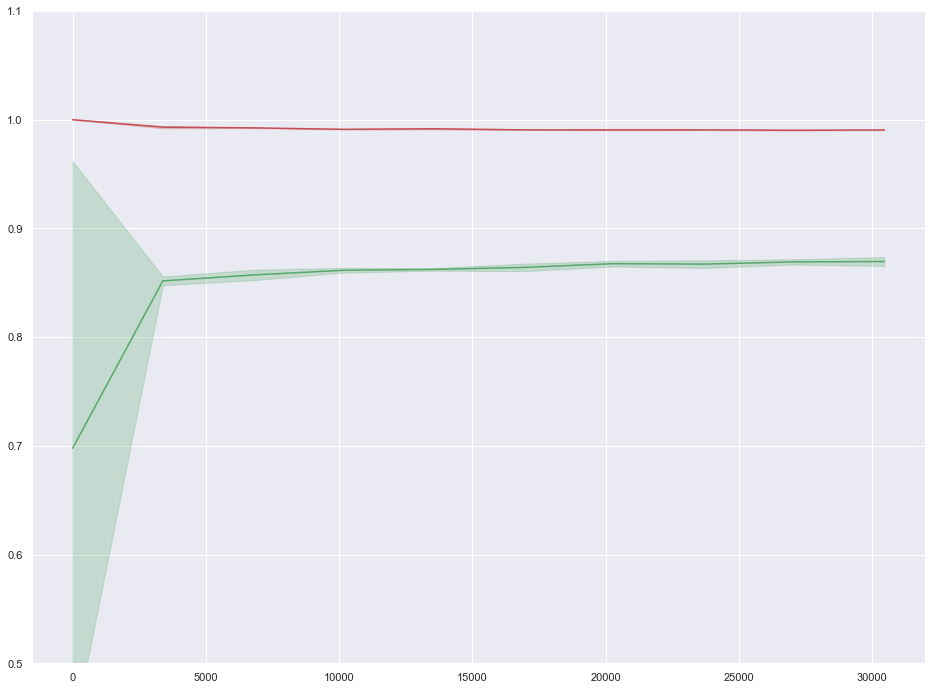

In [941]:
plt.figure(figsize = (16,12))
plt.plot(train_sizes, train_scores.mean(axis = 1), color = 'r')
plt.plot(train_sizes, valid_scores.mean(axis = 1), color = 'g')

plt.fill_between(train_sizes, train_scores.mean(axis = 1)- train_scores.std(axis = 1),
                     train_scores.mean(axis = 1)+ train_scores.std(axis = 1), alpha=0.25,
                     color="r")
plt.fill_between(train_sizes, valid_scores.mean(axis = 1) - valid_scores.std(axis = 1),
                     valid_scores.mean(axis = 1) + valid_scores.std(axis = 1), alpha=0.25, color="g")

plt.ylim(0.5,1.1)
plt.show()

In [942]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

y = train['target']
X = train.drop(columns=['target'])

X_scaled = MinMaxScaler().fit_transform(X)

##### *`5.3 Predecimos con regresion logística`*

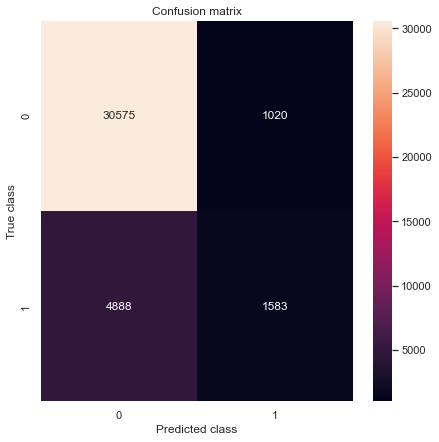

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     31595
           1       0.61      0.24      0.35      6471

    accuracy                           0.84     38066
   macro avg       0.74      0.61      0.63     38066
weighted avg       0.82      0.84      0.82     38066



In [943]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
#definimos nuestras etiquetas y features

#dividimos en sets de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3)
 
#creamos una función que crea el modelo que usaremos cada vez
def run_model(X_train, X_test, y_train, y_test):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base
 
#ejecutamos el modelo "tal cual"
model = run_model(X_train, X_test, y_train, y_test)
 
#definimos funciona para mostrar los resultados
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(7, 7))
    sns.heatmap(conf_matrix, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))
 
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)
#https://www.aprendemachinelearning.com/clasificacion-con-datos-desbalanceados/

##### *`5.3 Predecimos con Árboles de decisiones y medimos su exactitud`*

In [944]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from IPython.display import clear_output

In [945]:
#Guardamos en listas las posibilidades diferentes que tenemos en medida de que parte del dataset tomamos como entrenamiento y cual de test
tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,30,1)
i = 0
i_max = len(profundidades)
for profundidad in profundidades:
    i = i + 1
    clf = DecisionTreeClassifier(max_depth=profundidad)
    #validación cruzada en el árbol de decision
    #cv = indica en la cantidad de partes que sera dividido el dataset
    tree_scores = cross_validate(clf, X, y, cv=5, return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())
    
    clear_output(wait=True)
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

Completado: 100.0%


In [946]:
# 

clf = RandomForestClassifier(n_estimators=3, n_jobs=-1, oob_score= True, random_state = 42)

train_sizes, train_scores, valid_scores = learning_curve(clf, X_train, y_train, 
                                                         train_sizes = np.linspace(0.0001,1,10),
                                                         scoring = 'accuracy', cv=5)




c:\Users\Gise\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\Gise\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\Gise\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\Gise\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\Gise\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably me

A continuación, utilizaremos la llamada curva de aprendizaje. Esta es una herramienta que nos muestra el _trade-off_ entre varianza y sesgo de nuestro modelo. Mientras el score del random forest este más cerca de uno, el modelo ajusta mejor la función que esta representando. Muestra el score de la cross-validation y el del entrenamiento de un estimador variando la cantidad de muestras de set de entrenamiento.

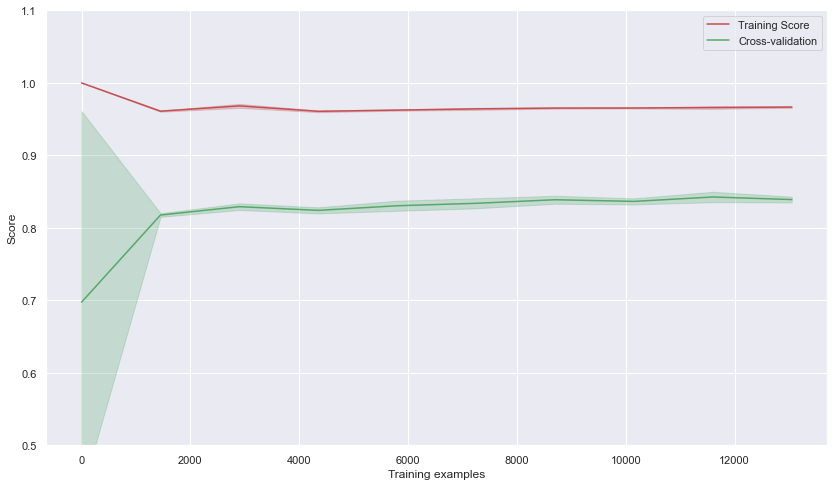

In [947]:
# Graficamos la curva de aprendizaje

plt.figure(figsize = (14,8))
plt.plot(train_sizes, train_scores.mean(axis = 1), color = 'r')
plt.plot(train_sizes, valid_scores.mean(axis = 1), color = 'g')

plt.fill_between(train_sizes, train_scores.mean(axis = 1)- train_scores.std(axis = 1),
                     train_scores.mean(axis = 1)+ train_scores.std(axis = 1), alpha=0.25,
                     color="r")
plt.fill_between(train_sizes, valid_scores.mean(axis = 1) - valid_scores.std(axis = 1),
                     valid_scores.mean(axis = 1) + valid_scores.std(axis = 1), alpha=0.25, color="g")

plt.ylim(0.5,1.1)
plt.legend(['Training Score','Cross-validation'])
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.show()

##### **ENSAMBLE**


- - -

##### **`STACKING`**

El método Stacking (Stacked Generalization o Meta Ensamblado) implica combinar las predicciones de distintos modelos de Machine Learning con un mismo conjunto de datos, tal como Bagging y Boosting.

Stacking suele utilizar modelos diferentes -pueden no ser todos, necesariamente, árboles de decisión- y se ajustan al mismo conjunto de datos. Por otro lado, esta técnica usa solo un modelo para aprender cómo ensamblar de mejor manera las predicciones de los modelos que contribuyen.

La arquitectura de este método implica dos o más *modelos base* (nivel 0) y un *metamodelo* (nivel 1) que combina las predicciones de los modelos base.

Este enfoque puede ser utilizado tanto en escenarios supervisados como no supervisados y su rendimiento aumentará cuanto más diversos sean los modelos del nivel 0.



In [948]:
#IMPORTAMOS LAS LIBRERÍAS NECESARIAS
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier # Modelo 1
from sklearn.svm import SVC # Modelo 2
from sklearn.tree import DecisionTreeClassifier # Modelo 3
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression # Metamodelo

##### **Modelo 1: K-nearest neighbors**

In [949]:
# Se define el clasificador
knn = KNeighborsClassifier(3)

# Se entrena el modelo
knn.fit(X_train, y_train)

# Predicciones
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Desempeño del modelo en train, calculando la precisión (accuracy)
knn_train_accuracy = accuracy_score(y_train, y_train_pred)

# Desempeño del modelo en test, calculando la precisión (accuracy)
knn_test_accuracy = accuracy_score(y_test, y_test_pred)

print('Desempeño del modelo para el Training set: ',knn_train_accuracy)
print('Desempeño del modelo para el Test set: ',knn_test_accuracy)

Desempeño del modelo para el Training set:  0.906644599730293
Desempeño del modelo para el Test set:  0.8402511427520623


##### **Modelo 2: Support vector machine**

In [950]:
# Se define el clasificador
svm = SVC(gamma=2, C=1)

# Se entrena el modelo
svm.fit(X_train, y_train)

# Predicciones
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Desempeño del modelo en train, calculando la precisión (accuracy)
svm_train_accuracy = accuracy_score(y_train, y_train_pred) 

# Desempeño del modelo en test, calculando la precisión (accuracy)
svm_test_accuracy = accuracy_score(y_test, y_test_pred)


print('Desempeño del modelo para el Training set: ',svm_train_accuracy)
print('Desempeño del modelo para el Test set: ',svm_test_accuracy)

Desempeño del modelo para el Training set:  0.9016182420007356
Desempeño del modelo para el Test set:  0.8367046708348658


##### **Modelo 3: Árboles de decisión**

In [951]:
# Se define el clasificador
dt = DecisionTreeClassifier(max_depth=9)

# Se entrena el modelo
dt.fit(X_train, y_train)

# Predicciones
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Desempeño del modelo entrenado, calculando la precisión (accuracy)
dt_train_accuracy = accuracy_score(y_train, y_train_pred)

# Desempeño del modelo testeado, calculando la precisión (accuracy)
dt_test_accuracy = accuracy_score(y_test, y_test_pred)

print('Desempeño del modelo para el Training set: ',dt_train_accuracy)
print('Desempeño del modelo para el Test set: ',dt_test_accuracy)

Desempeño del modelo para el Training set:  0.8853745249478975
Desempeño del modelo para el Test set:  0.8584826354226869


##### **Metamodelo: Regresión logística**

In [952]:
# Se define la lista de estimadores con los 3 modelos generados
estimator_list = [
    ('knn',knn),
    ('svm_rbf',svm),
    ('dt',dt)]

# Se genera el modelo apilado (stacking)
# Se estima con los 3 modelos generados
# El estimador de la predicción final será una regresión logística (metamodelo).
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression())

# Se entrena el metamodelo
stack_model.fit(X_train, y_train)

# Predicciones
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)

# Desempeño del metamodelo en train, calculando la precisión (accuracy)
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred)

# Desempeño del metamodelo en test, calculando la precisión (accuracy)
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred)

print('Desempeño del metamodelo para el Training set: ',stack_model_train_accuracy)
print('Desempeño del metamodelo para el Test set: ',stack_model_test_accuracy)

Desempeño del metamodelo para el Training set:  0.9032119651832782
Desempeño del metamodelo para el Test set:  0.8609257605212001


#### ***`6. Dataset Test`***

##### *`6.1 Acomodamos la forma del dataset`*

In [953]:
#Cargo el dataset de test
test=carga_datos(r'C:\Users\Gise\Desktop\Data Since\LABS\Individuales\02\Datathon-mainmio\Datathon-main\properties_colombia_test.csv')

In [954]:
test.columns

Index(['Unnamed: 0', 'id', 'ad_type', 'start_date', 'end_date', 'created_on',
       'lat', 'lon', 'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms',
       'bathrooms', 'surface_total', 'surface_covered', 'currency',
       'price_period', 'title', 'description', 'property_type',
       'operation_type', 'geometry'],
      dtype='object')

In [955]:
train.columns

Index(['latitud', 'longitud', 'bedrooms', 'bathrooms', 'surface_covered',
       'price_period', 'target', 'mes_start', 'diff_month', 'apartamento',
       'casa', 'local comercial', 'lote', 'oficina'],
      dtype='object')

In [956]:
test=limpieza_fechas(test)
df=test
df=transformacion_fechas(df)
test=df

In [957]:
test.price_period.replace('Mensual',1,inplace=True)
test.price_period.fillna(0,inplace=True)
test.price_period.astype('int32')
test.head()

,Unnamed: 0,id,ad_type,created_on,lat,lon,l1,l2,l3,l4,...,currency,price_period,title,description,property_type,operation_type,geometry,ano_start,mes_start,diff_month
0,852569,pCiVu6rxpBq9dCZfYCXXgA==,Propiedad,2020-09-04,4.722000,-74.075000,Colombia,Cundinamarca,Bogotá D.C,Zona Noroccidental,...,COP,0.0,Casa En Arriendo/venta En Bogota Sotileza Cod....,"EXCLUSIVA CASA EN VENTA Y ARRIENDO, UBICADA EN...",Casa,Venta,POINT (-74.075 4.722),2020,9,0.0
1,121379,L0XSQ7mF1TWb1lHRg4n2+A==,Propiedad,2020-10-20,NaN,NaN,Colombia,Antioquia,Envigado,NaN,...,COP,1.0,SE VENDE APARTAMENTO EN EL SECTOR DE ZUÑIGA-EN...,"PR 7555. Apartamento Duplex en unidad cerrada,...",Apartamento,Venta,POINT EMPTY,2020,10,0.0
2,119504,FbWRxZOMNoUzVOLXgkum1A==,Propiedad,2020-10-20,6.259253,-75.628381,Colombia,Antioquia,Medellín,San Javier,...,COP,0.0,Casa Barata San Javier Solo por este mes,"Casa compraventa escrituras en \n proceso,sala...",Casa,Venta,POINT (-75.6283806 6.25925267),2020,10,0.0
3,227304,RUV1P+3UOmNdlJ9fBdWFyw==,Propiedad,2020-12-10,6.203000,-75.556000,Colombia,Antioquia,Medellín,El Poblado,...,COP,0.0,Lote En Venta En Medellin La Calera Cod. VRPR6330,CODIGO 6330LOTE PARA LA VENTA DE 2793MTS,Lote,Venta,POINT (-75.556 6.203),2020,12,25.0
4,228600,ifKutEAhyovuDNeYrFFV+A==,Propiedad,2020-12-10,NaN,NaN,Colombia,Antioquia,Medellín,NaN,...,COP,0.0,Casa en Venta Ubicado en MEDELLIN,Codigo Inmueble 505457 Casa en venta en el sec...,Casa,Venta,POINT EMPTY,2020,12,0.0


In [958]:
test.property_type.replace('Finca','Otro',inplace=True)
test.property_type.replace('Finca','Otro',inplace=True)
test.property_type.replace('Finca','Otro',inplace=True)
test.property_type.replace('Parqueadero','Otro',inplace=True)
#Agregamos al df
test= pd.concat([test, pd.get_dummies(test['property_type'])], axis=1)
test.drop('Otro',axis=1,inplace=True)
test.head(2)

,Unnamed: 0,id,ad_type,created_on,lat,lon,l1,l2,l3,l4,...,operation_type,geometry,ano_start,mes_start,diff_month,Apartamento,Casa,Local comercial,Lote,Oficina
0,852569,pCiVu6rxpBq9dCZfYCXXgA==,Propiedad,2020-09-04,4.722,-74.075,Colombia,Cundinamarca,Bogotá D.C,Zona Noroccidental,...,Venta,POINT (-74.075 4.722),2020,9,0.0,0,1,0,0,0
1,121379,L0XSQ7mF1TWb1lHRg4n2+A==,Propiedad,2020-10-20,NaN,NaN,Colombia,Antioquia,Envigado,NaN,...,Venta,POINT EMPTY,2020,10,0.0,1,0,0,0,0


In [959]:
test.columns

Index(['Unnamed: 0', 'id', 'ad_type', 'created_on', 'lat', 'lon', 'l1', 'l2',
       'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'currency', 'price_period', 'title',
       'description', 'property_type', 'operation_type', 'geometry',
       'ano_start', 'mes_start', 'diff_month', 'Apartamento', 'Casa',
       'Local comercial', 'Lote', 'Oficina'],
      dtype='object')

In [960]:
#Borro las columnas
test.drop(['Unnamed: 0', 'id', 'ad_type', 'created_on', 'l1', 'l2',
       'l3', 'l4', 'l5', 'l6', 'rooms', 
       'surface_total', 'currency', 'title',
       'description', 'property_type', 'operation_type', 'geometry',
       'ano_start'],axis=1,inplace=True)


In [961]:
test.shape,train.shape

((65850, 13), (54380, 14))

In [962]:
#Cambio los nombres de las columnas
train.rename(columns={'lat':'latitud','lon':'longitud'},inplace=True)

In [963]:
df_test_predict=pd.DataFrame(y_test_pred)

In [964]:
df_test_predict.rename({0:'pred'},axis=1,inplace=True)

In [965]:
df_test_predict.head(3)

,pred
0,1
1,0
2,0


In [966]:
df_test_predict.to_csv('sgisela945.csv', index=False)

##### ***`7. Procesamiento del lenguaje natural: Queda pendiente`***

In [967]:
#Sacar del texto carácteres que no sean palabras

# Importamos esta libreria que nos permite reemplzar caracteres
import re

# Importamos la función que nos permite Stemmizar de nltk y definimos el stemmer
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [968]:
# Traemos las stopwords: palabras que no hacen a la significancia de la oración
#inglés:
#stopwords = nltk.corpus.stopwords.words('english')
# español:
stopwords = nltk.corpus.stopwords.words('spanish')
stopwords = [palabra for palabra in stopwords if 'not' not in palabra]

In [974]:
''' dataset_no_caro = train[train.target==0]
todos_titulares_no_caro = []
for index,i in enumerate( dataset_no_caro.shape[0]):
    titular = dataset_no_caro.title[index]
    titular = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titular)
    titular = [word for word in titular if word not in stopwords]
    #titular = [word for word in titular if word not in filtrar]

    todos_titulares_no_caro.append(titular)
todos_titulares_no_caro = list(itertools.chain(*todos_titulares_no_caro))
freq_no_caro = nltk.FreqDist(todos_titulares_no_caro)
df_no_caro = pd.DataFrame(list(freq_no_caro.items()), columns = ["Word","Frequency"])
#ordeno las palabras según la frequencia en orden descendente
df_no_caro.sort_values('Frequency',ascending=False, inplace = True)
#restituyo los índices
df_no_caro.reset_index(drop = True, inplace=True)
df_no_caro.head(10)'''

' dataset_no_caro = train[train.target==0]\ntodos_titulares_no_caro = []\nfor index,i in enumerate( dataset_no_caro.shape[0]):\n    titular = dataset_no_caro.title[index]\n    titular = nltk.tokenize.RegexpTokenizer("[\\w]+").tokenize(titular)\n    titular = [word for word in titular if word not in stopwords]\n    #titular = [word for word in titular if word not in filtrar]\n\n    todos_titulares_no_caro.append(titular)\ntodos_titulares_no_caro = list(itertools.chain(*todos_titulares_no_caro))\nfreq_no_caro = nltk.FreqDist(todos_titulares_no_caro)\ndf_no_caro = pd.DataFrame(list(freq_no_caro.items()), columns = ["Word","Frequency"])\n#ordeno las palabras según la frequencia en orden descendente\ndf_no_caro.sort_values(\'Frequency\',ascending=False, inplace = True)\n#restituyo los índices\ndf_no_caro.reset_index(drop = True, inplace=True)\ndf_no_caro.head(10)'

In [ ]:
#grafico un diagrama de columnas con las palabras y las frecuencias de aparición
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_no_caro.iloc[:30].Word, y = df_no_caro.iloc[:30].Frequency)
#etiquetas a 90°
for item in plot.get_xticklabels(): item.set_rotation(90)
plt.show()

En resumen, lo que hicimos fue stackear o apilar 3 modelos distintos generando predicciones, para luego utilizar como predicción final el metamodelo que, en este caso, fue de regresión logística. 
Espero que les haya sido leve!
